In [1]:
import os
import operator

import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200
import polars as pl

import seaborn as sns
import matplotlib.pyplot as plt

from clickhouse_driver import Client

client = Client('localhost', database="thesisaggressiveclientdb")

In [17]:
%%time 

exp_data_sql = """
SELECT
	ex.*
FROM
	experiment ex
"""
exp_df = client.query_dataframe(exp_data_sql)

def extract_timeout_info(row):
	raw_exp_id = row["exp_id"]
	raw_exp_id = raw_exp_id.replace("thesis_group_aggressive_client_8clients___", "")
	raw_exp_id = raw_exp_id[:raw_exp_id.index("_withattacker")]
	parts = raw_exp_id.replace("sec_ackto", "").replace("_acktoscale", "").split("_")
	parts[0] = int(parts[0])
	parts[1] = float(parts[1].replace("o", "."))
	return parts

def extract_ack_timeout(row):
	return extract_timeout_info(row)[0]

def extract_ack_scale(row):
	return extract_timeout_info(row)[1]

exp_df["ack_timeout"] = exp_df.apply(extract_ack_timeout, axis=1)
exp_df["ack_scale"] = exp_df.apply(extract_ack_scale, axis=1)
exp_df["ack_timeout_and_scale"] = exp_df["ack_timeout"].astype(str) + "sec_" + exp_df["ack_scale"].astype(str) + "x"

print(len(exp_df.exp_id.unique().tolist()))
print("\n".join(exp_df.exp_id.unique().tolist()))
print()
exp_df

18
thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_aggressive_client_8clients___1sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_aggressive_client_8clients___1sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_aggressive_client_8clients___1sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_aggressive_client_8clients___1sec_ackto_2o0_acktoscale_withattacker_8

exp_id  \
0   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
2   thesis_group_aggressive_client_8clients___1sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3   thesis_group_aggressive_client_8clients___1sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
4   thesis_group_aggressive_client_8clients___1sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
5   thesis_group_aggressive_client_8clients___1sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
6   thesis_group_aggressive_client_8clients___2sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
7   thesis_group_aggressive_client_8clients___2sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
8   thesis_group_aggressive_client_8clients___2sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
9   thesis_group_aggressive_client_8clients___2sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
10  thesis_group_aggressive_client_8clients___2sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
11  thesis_group_aggressive_client_8clients___2sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
12  thesis_group_aggressive_client_8clients___3sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
13  thesis_group_aggressive_client_8clients___3sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
14  thesis_group_aggressive_client_8clients___3sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
15  thesis_group_aggressive_client_8clients___3sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
16  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
17  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

   attacker_rate  server_connections  max_keep_alive_requests  num_clients  \
0        100mbps                 256                        0            8   
1        100mbps                 256                        0            8   
2        100mbps                 256                        0            8   
3        100mbps                 256                        0            8   
4        100mbps                 256                        0            8   
5        100mbps                 256                        0            8   
6        100mbps       

In [3]:
%%time 

fetch_metadata_sql = """
SELECT
	n.node_name,
	dn.dnid,
	dn.node_id,
  dn.exp_id
FROM 
	deployed_node dn
	JOIN node n ON n.node_id = dn.node_id
"""

metadata_df = client.query_dataframe(fetch_metadata_sql)

dnid_map_node_name = dict()
dnid_map_exp_id = dict()
node_id_map_node_name = dict()

for record in metadata_df.to_dict(orient="records"):
  dnid = record["dnid"]
  node_id = record["node_id"]
  node_name = record["node_name"]
  exp_id = record["exp_id"]
  
  assert dnid not in dnid_map_node_name
  dnid_map_node_name[dnid] = node_name
  dnid_map_exp_id[dnid] = exp_id
  
  if node_id in node_id_map_node_name:
    assert node_id_map_node_name[node_id] == node_name
  else:
    node_id_map_node_name[node_id] = node_name
  
client_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("client"))
attacker_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("attacker"))
proxy_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("proxy"))
originserver_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("originserver"))

client_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("client"))
proxy_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("proxy"))
originserver_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("originserver"))

print(f"{client_dnids=}")
print(f"{attacker_dnids=}")
print(f"{proxy_dnids=}")
print(f"{originserver_dnids=}")
print(f"{client_node_ids=}")
print(f"{proxy_node_ids=}")
print(f"{originserver_node_ids=}")

client_dnids={2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 32, 33, 38, 39, 40, 41, 42, 43, 44, 45, 50, 51, 52, 53, 54, 55, 56, 57, 62, 63, 64, 65, 66, 67, 68, 69, 74, 75, 76, 77, 78, 79, 80, 81, 86, 87, 88, 89, 90, 91, 92, 93, 98, 99, 100, 101, 102, 103, 104, 105, 110, 111, 112, 113, 114, 115, 116, 117, 122, 123, 124, 125, 126, 127, 128, 129, 134, 135, 136, 137, 138, 139, 140, 141, 146, 147, 148, 149, 150, 151, 152, 153, 158, 159, 160, 161, 162, 163, 164, 165, 170, 171, 172, 173, 174, 175, 176, 177, 182, 183, 184, 185, 186, 187, 188, 189, 194, 195, 196, 197, 198, 199, 200, 201, 206, 207, 208, 209, 210, 211, 212, 213}
attacker_dnids={1, 97, 121, 193, 37, 133, 73, 169, 13, 109, 205, 49, 145, 85, 157, 181, 25, 61}
proxy_dnids={191, 35, 131, 71, 167, 11, 107, 155, 203, 47, 143, 83, 119, 179, 23, 215, 59, 95}
originserver_dnids={34, 130, 70, 154, 166, 10, 106, 202, 46, 142, 82, 178, 22, 118, 214, 58, 190, 94}
client_node_ids={2, 3, 4, 5, 6, 7, 8, 9}
proxy_

In [4]:
client_messages_sql = f"""
WITH client_sends AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_retransmitted AS coap_retransmitted
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
), 

client_recvs AS (
  SELECT
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_code AS response_code
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT
  client_sends.exp_id AS exp_id,
  client_sends.trial AS trial,
  client_sends.observer_id AS observer_id,
  client_sends.message_marker AS message_marker,
  groupArray(client_recvs.response_code)[1] AS response_code,
  MIN(client_sends.observe_timestamp) AS send_time_sec,
  MIN(client_recvs.observe_timestamp) AS recv_time_sec,
  MIN(client_sends.observe_timestamp) AS first_send_time_sec,
  MAX(client_sends.observe_timestamp) AS last_send_time_sec,
  MIN(client_recvs.observe_timestamp) AS first_recv_time_sec,
  MAX(client_recvs.observe_timestamp) AS last_recv_time_sec,
  1e3 * (MIN(client_recvs.observe_timestamp) - MIN(client_sends.observe_timestamp)) AS rtt_ms_first_transmission,
  1e3 * (MIN(client_recvs.observe_timestamp) - MAX(client_sends.observe_timestamp)) AS rtt_ms_last_transmission,
  COUNT(client_sends.observe_timestamp) AS num_send_observations,
  COUNT(client_recvs.observe_timestamp) AS num_recv_observations,
  SUM(CASE WHEN client_sends.coap_retransmitted = true THEN 1 ELSE 0 END) AS num_retransmissions
FROM client_sends
  LEFT JOIN client_recvs USING (trial, observer_id, message_marker)
GROUP BY 
  exp_id, trial, observer_id, message_marker
ORDER BY
  exp_id, trial, observer_id, message_marker
"""

message_rtt_df = client.query_dataframe(client_messages_sql)
message_rtt_df.observer_id.replace(dnid_map_node_name, inplace=True)

message_rtt_df["successful_message"] = False
message_rtt_df.loc[(message_rtt_df["response_code"] == "content"), "successful_message"] = True

print(message_rtt_df["response_code"].unique())

message_rtt_df = message_rtt_df.merge(exp_df, on="exp_id", how="left")

# Due to left join, we need to eliminate lines that
# have negative RTT, so we NaN them.
message_rtt_df.loc[
  (message_rtt_df["rtt_ms_first_transmission"] < 0)
  | (message_rtt_df["rtt_ms_last_transmission"] < 0)
  ,
  ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]
] = np.nan

message_rtt_df

['content' 'bad_gateway' '']


exp_id  \
0        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
...                                                                                                                                                                                         ...   
1130253  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1130254  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1130255  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1130256  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1130257  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

         trial observer_id  message_marker response_code  send_time_sec  \
0            1     client1               1       content       0.000000   
1            1     client1               2       content       0.361019   
2            1     client1               3       content       0.423303   
3            1     client1               4       content       0.484456   
4            1     client1               5       content       0.543486   
...        ...         ...             ...           ...            ...   
1130253      5     client8          699934       content     125.851225   
1130254      5     client8          699935       content     125.905013   
1130255      5     client8          699936       content     125.958848   
1130256      5     client8          699937       content     126.012495   
1130257      5     client8          699938                   126.066246   

         recv_time_sec  first_send_time_sec  last_send_time_sec  \
0             0.344467             0.000000            0.000000   
1             0.421288             0.361019            0.361019   
2             0.482537             0.423303            0.423303   
3             0.541019             0.484456            0.484456   
4             0.600021             0.543486            0.543486   
...                ...                  ...                 ...   
1130253     125.904233           125.851225          125.851225   
1130254     125.958086           125.905013          125.905013   
1130255     126.011722           125.958848          125.958848   
1130256     126.065508           126.012495          126.012495   
1130257       0.000000           126.066246          126.066246   

         first_recv_time_sec  ...  max_retries  keep_alive_duration  \
0                   0.344467  ...            2                    5

In [5]:
%%time

client_sends_sql = f"""
WITH client_sends AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_retransmitted AS coap_retransmitted
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
)

SELECT * FROM client_sends
ORDER BY exp_id, trial, observer_id, message_marker
"""

client_sends_df = client.query_dataframe(client_sends_sql)
client_sends_df.observer_id.replace(dnid_map_node_name, inplace=True)

client_sends_df

CPU times: user 2.53 s, sys: 757 ms, total: 3.29 s
Wall time: 3.89 s


exp_id  \
0        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
...                                                                                                                                                                                         ...   
1137753  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1137754  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1137755  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1137756  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1137757  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

         observe_timestamp  trial observer_id  message_marker  \
0                 0.000000      1     client1               1   
1                 0.361019      1     client1               2   
2                 0.423303      1     client1               3   
3                 0.484456      1     client1               4   
4                 0.543486      1     client1               5   
...                    ...    ...         ...             ...   
1137753         125.851225      5     client8          699934   
1137754         125.905013      5     client8          699935   
1137755         125.958848      5     client8          699936   
1137756         126.012495      5     client8          699937   
1137757         126.066246      5     client8          699938   

         coap_retransmitted  
0                     False  
1                     False  
2                     False  
3                     False  
4                     False  
...                     ...  
1137753               False  
1137754               False  
1137755               False  
1137756               False  
1137757               False  

[1137758 rows x 6 columns]

In [6]:
%%time

client_recvs_sql = f"""
WITH client_recvs AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_code AS response_code
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT * FROM client_recvs
ORDER BY exp_id, trial, observer_id, message_marker
"""

client_recvs_df = client.query_dataframe(client_recvs_sql)
client_recvs_df.observer_id.replace(dnid_map_node_name, inplace=True)

client_recvs_df["successful_message"] = False
client_recvs_df.loc[(client_recvs_df["response_code"] == "content"), "successful_message"] = True

print(client_recvs_df["response_code"].unique())

client_recvs_df

['content' 'bad_gateway']
CPU times: user 2.7 s, sys: 448 ms, total: 3.15 s
Wall time: 3.78 s


exp_id  \
0        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
...                                                                                                                                                                                         ...   
1129599  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1129600  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1129601  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1129602  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1129603  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

         observe_timestamp  trial observer_id  message_marker response_code  \
0                 0.344467      1     client1               1       content   
1                 0.421288      1     client1               2       content   
2                 0.482537      1     client1               3       content   
3                 0.541019      1     client1               4       content   
4                 0.600021      1     client1               5       content   
...                    ...    ...         ...             ...           ...   
1129599         125.850477      5     client8          699933       content   
1129600         125.904233      5     client8          699934       content   
1129601         125.958086      5     client8          699935       content   
1129602         126.011722      5     client8          699936       content   
1129603         126.065508      5     client8          699937       content   

         successful_message  
0                      True  
1                      True  
2                      True  
3                      True  
4                      True  
...                     ...  
1129599                True  
1129600                True  
1129601                True  
1129602                True  
1129603                True  

[1129604 rows x 7 columns]

In [7]:
%%time

metric_usage_sql = f"""
SELECT
	dn.exp_id,
	nm.trial,
	nm.observer_id,
	nm.metric_type,
	AVG(nm.metric_value) AS avg_value,
	MIN(nm.metric_value) AS min_value,
	MAX(nm.metric_value) AS max_value
FROM
	node_metric nm
	JOIN deployed_node dn ON dn.dnid = nm.observer_id
GROUP BY
	dn.exp_id, nm.trial, nm.observer_id, nm.metric_type
ORDER BY
	dn.exp_id, nm.trial, nm.metric_type, nm.observer_id
"""

metric_df = client.query_dataframe(metric_usage_sql)

metric_df.observer_id.replace(dnid_map_node_name, inplace=True)

metric_df = metric_df.merge(exp_df, on="exp_id", how="left")

metric_df

CPU times: user 35.4 ms, sys: 2.08 ms, total: 37.5 ms
Wall time: 227 ms


exp_id  \
0    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
..                                                                                                                                                                                      ...   
355  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
356  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
357  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
358  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
359  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

     trial   observer_id         metric_type    avg_value  min_value  \
0        1  originserver     cpu_utilization     4.934286        0.4   
1        1         proxy     cpu_utilization    16.137857        0.4   
2        1  originserver  memory_utilization   271.309091      249.0   
3        1         proxy  memory_utilization  3659.088333      254.0   
4        2  originserver     cpu_utilization     5.000714        0.5   
..     ...           ...                 ...          ...        ...   
355      4         proxy  memory_utilization  3773.459866      255.0   
356      5  originserver     cpu_utilization     5.035000        0.5   
357      5         proxy     cpu_utilization    16.048571        0.5   
358      5  originserver  memory_utilization   283.671074      261.0   
359      5         proxy  memory_utilization  3698.919866      256.0   

     max_value attacker_rate  server_connections  max_keep_alive_requests  \
0         21.0       100mbps                 256                        0   
1         88.6       100mbps                 256                        0   
2        292.0       100mbps                 256                        0   
3       6031.0       100mbps                 256                        0   
4         20.4       100mbps                 256                        0   
..         ...           ...                 ...                      ...   
355     6257.0       100mbps                 256                        0   
356       21.0       100mbps                 256                        0   
357       88.3       100mbps                 256                        0   
358      308.0       100mbps                 256                        0   
359     6131.0       100mbps                 256                        0   

     ...  max_retries  keep_alive_duration  request_retry_interval  \
0    ...            2       

In [8]:
%%time

client_rps_df = (
  message_rtt_df
  .groupby(by=["exp_id", "trial", "observer_id"])
  .aggregate(
    num_messages=("successful_message", "count"),
    num_successful_messages=("successful_message", "sum"),
    mean_rps=("successful_message", "sum"),
    max_num_retransmissions=("num_retransmissions", "max"),
    total_num_retransmissions=("num_retransmissions", "sum"),
    stddev_rtt_ms=("rtt_ms_first_transmission", "std"),
    min_rtt_ms=("rtt_ms_first_transmission", "min"),
    median_rtt_ms=("rtt_ms_first_transmission", "median"),
    mean_rtt_ms=("rtt_ms_first_transmission", "mean"),
    max_rtt_ms=("rtt_ms_first_transmission", "max"),
    rtt_ms_p0=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.00)),
    rtt_ms_p25=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.25)),
    rtt_ms_p50=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.50)),
    rtt_ms_p75=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.75)),
    rtt_ms_p90=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.90)),
    rtt_ms_p99=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.99)),
    rtt_ms_p100=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=1.00)),
    first_active_time=("first_send_time_sec", "min"),
    last_active_time=("last_recv_time_sec", "max"),
  )
  .reset_index()
)
assert client_rps_df["min_rtt_ms"].eq(client_rps_df["rtt_ms_p0"]).all()
assert client_rps_df["median_rtt_ms"].eq(client_rps_df["rtt_ms_p50"]).all()
assert client_rps_df["max_rtt_ms"].eq(client_rps_df["rtt_ms_p100"]).all()

client_rps_df["num_failed_messages"] = client_rps_df["num_messages"] - client_rps_df["num_successful_messages"]
client_rps_df["average_rps"] = client_rps_df["num_successful_messages"] / (client_rps_df["last_active_time"] - client_rps_df["first_active_time"])

client_rps_df = client_rps_df.merge(exp_df, on="exp_id")
bool_col_replacement = {
  "run_proxy_with_dtls": {True: "dtls", False: "coap"},
  "run_proxy_with_https": {True: "https", False: "http"},
  "reuse_connections": {True: "reuse-connections", False: "no-connection-reuse"},
  "run_attacker": {True: "attacker", False: "no-attacker"},
}
client_rps_df.replace(bool_col_replacement, inplace=True)

client_rps_df["mean_rps"] /= client_rps_df["client_duration"]

client_rps_df[["exp_id", "trial", "observer_id", "mean_rps"]]

client_rps_df

CPU times: user 4.84 s, sys: 3.86 ms, total: 4.84 s
Wall time: 4.84 s


exp_id  \
0    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
..                                                                                                                                                                                      ...   
715  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
716  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
717  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
718  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
719  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

     trial observer_id  num_messages  num_successful_messages   mean_rps  \
0        1     client1          1568                     1562  13.016667   
1        1     client2          1578                     1572  13.100000   
2        1     client3          1578                     1571  13.091667   
3        1     client4          1579                     1573  13.108333   
4        1     client5          1580                     1573  13.108333   
..     ...         ...           ...                      ...        ...   
715      5     client4          1560                     1555  12.958333   
716      5     client5          1563                     1557  12.975000   
717      5     client6          1560                     1558  12.983333   
718      5     client7          1564                     1559  12.991667   
719      5     client8          1565                     1560  13.000000   

     max_num_retransmissions  total_num_retransmissions  stddev_rtt_ms  \
0                          5                         23     328.236786   
1                          5                         25     323.315834   
2                          5                         24     325.442252   
3                          4                         21     334.219964   
4                          8                         29     321.988103   
..                       ...                        ...            ...   
715                        1                          6     350.452858   
716                        1                          6     317.102636   
717                        2                          6     442.379927   
718                        1                          6     318.761679   
719                        1                          6     318.518112   

     min_rtt_ms  ...  max_retries  keep_alive_duration  \
0     51.707983  ...        

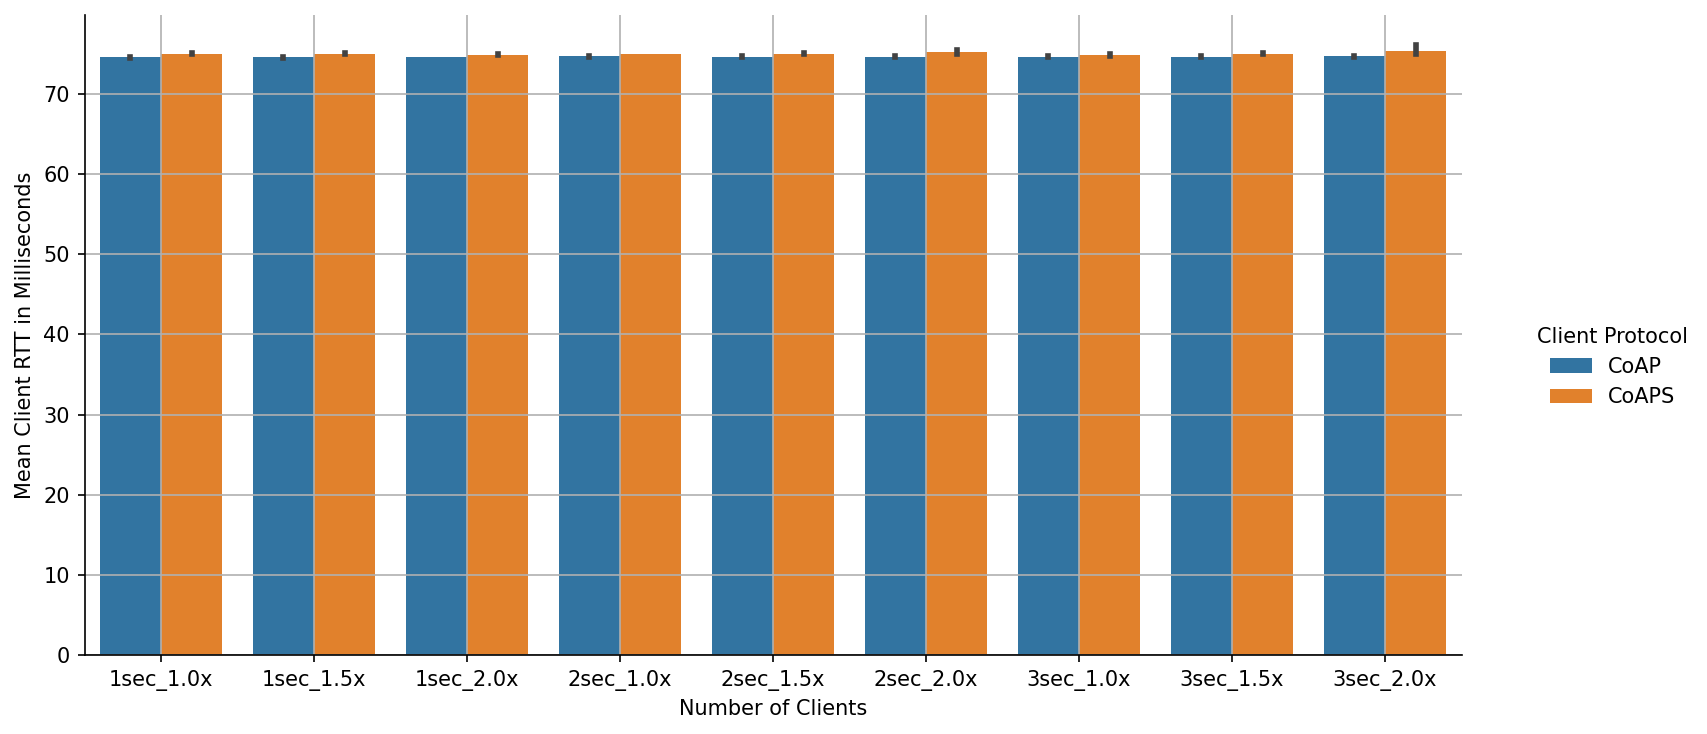

In [9]:
### Plot effect of RTT as a result of increasing number of clients

import matplotlib as mpl
inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams['figure.dpi']  = 150

client_rps_df.replace({
  "run_proxy_with_dtls": {
    "coap": "CoAP",
    "dtls": "CoAPS",
  }
}, inplace=True)

df = client_rps_df

g = sns.catplot(
  data=df,
  kind="bar",
  x="ack_timeout_and_scale",
  y="mean_rtt_ms",
  hue="run_proxy_with_dtls",
  # style="run_proxy_with_dtls",
  # markers=True,
  # markersize=7,
  aspect=2,
)

g.legend.set_title("Client Protocol")

g.set_xlabels("Number of Clients")
g.set_ylabels("Mean Client RTT in Milliseconds")

plt.grid(True, axis="both")

plt.show()

In [10]:
### At this point, we generate figures for the paper

plt.rcParams['figure.dpi']  = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size']        = '18'
plt.rcParams['lines.linewidth']  = 3
plt.rcParams['lines.markersize'] = 9

client_rps_df.replace({
  "run_proxy_with_dtls": {
    "coap": "CoAP",
    "dtls": "CoAPS",
  }
}, inplace=True)

metric_df.replace({
  "run_proxy_with_dtls": {
    False: "CoAP",
    True : "CoAPS",
  }
}, inplace=True)

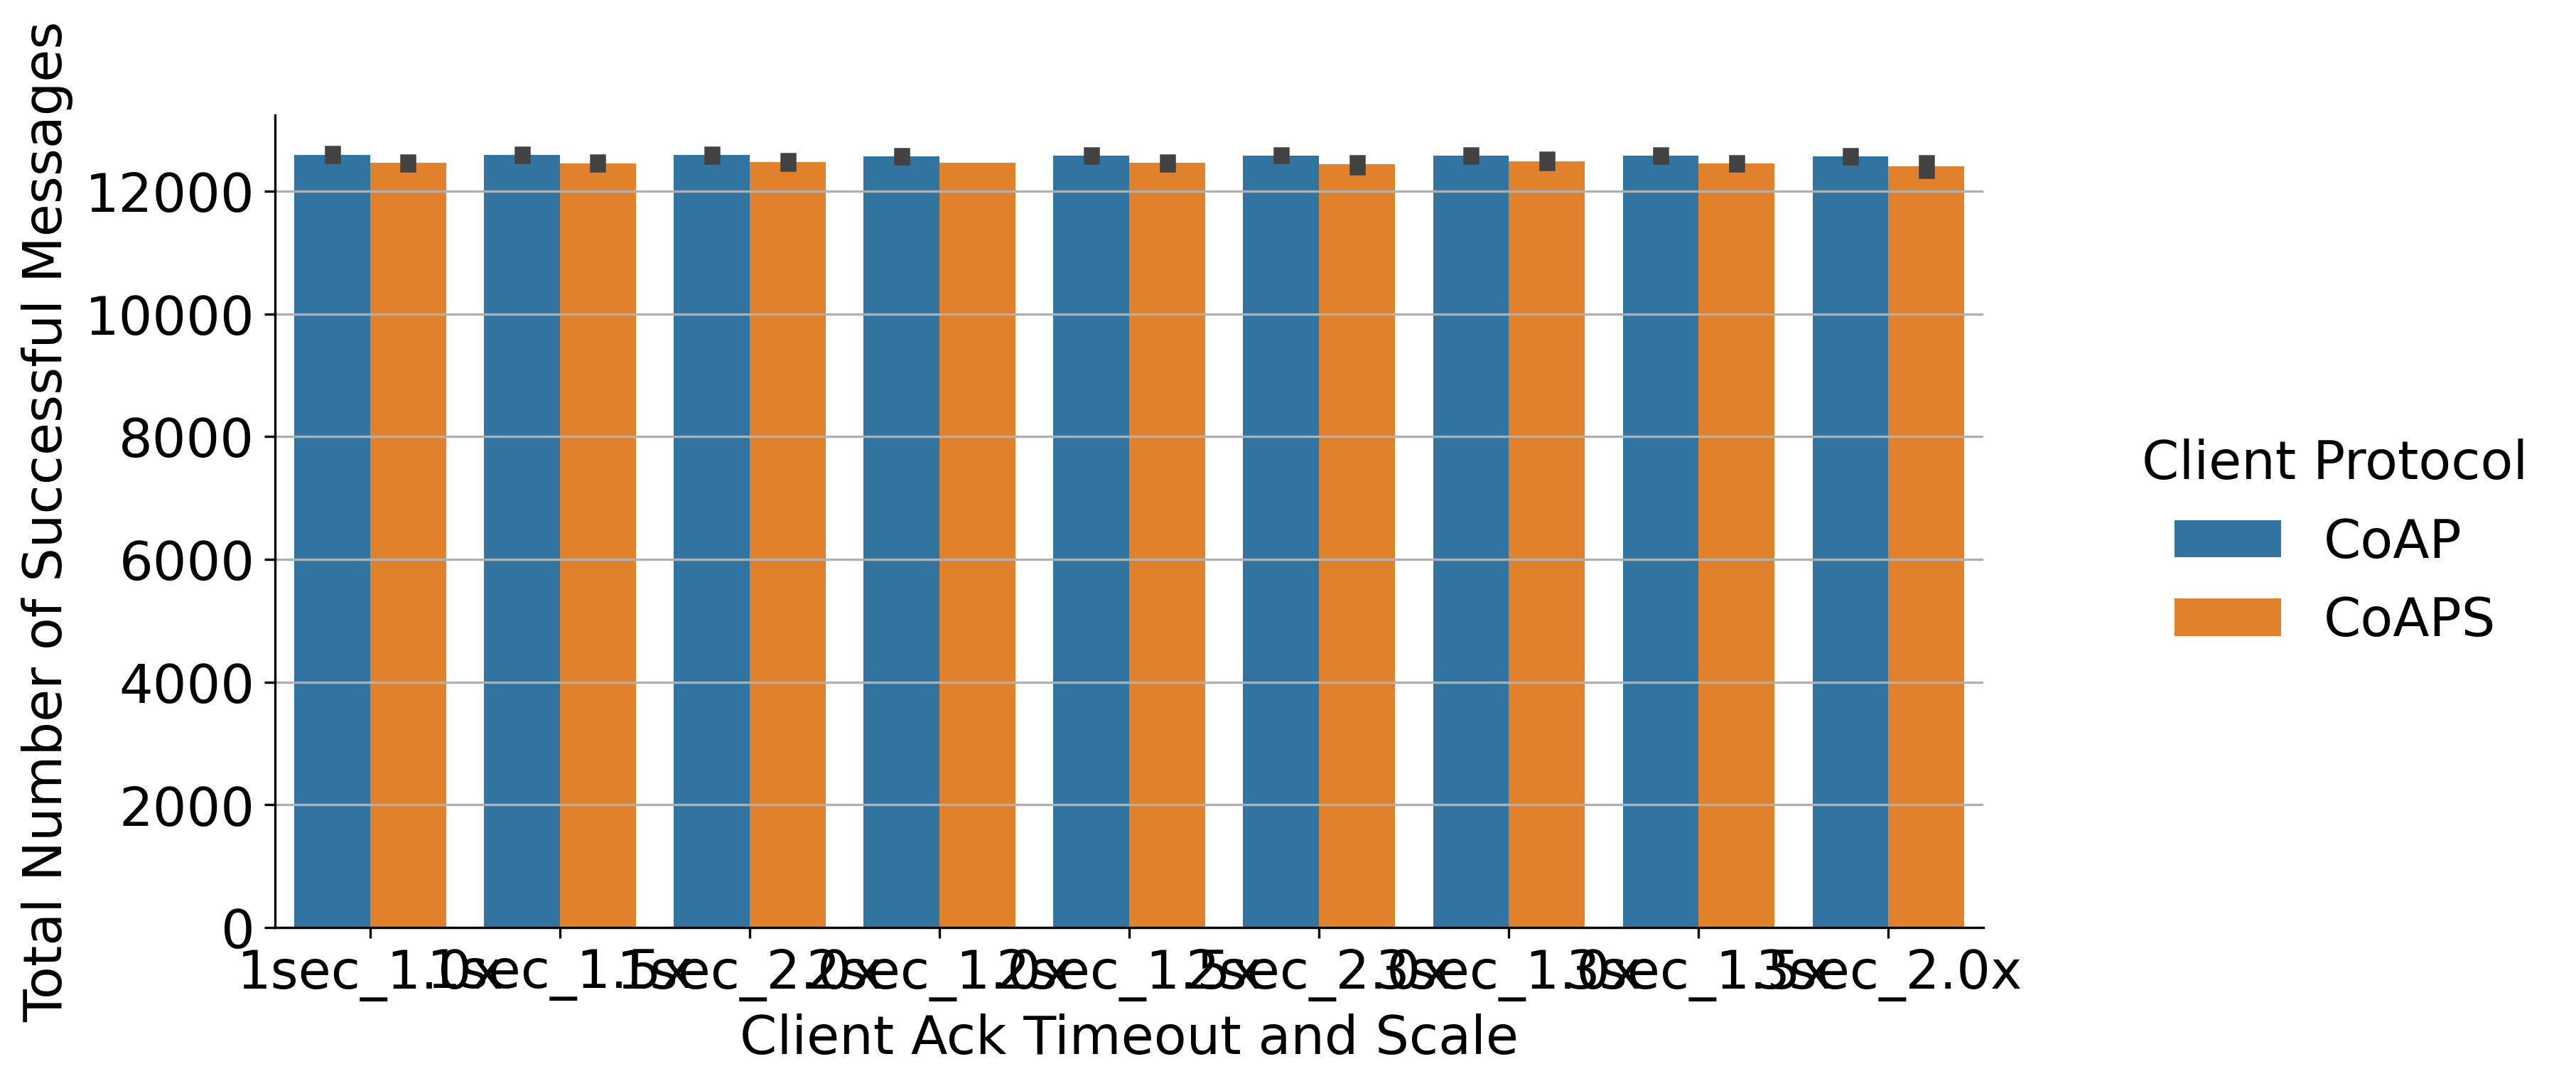

exp_id  \
0   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
2   thesis_group_aggressive_client_8clients___1sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3   thesis_group_aggressive_client_8clients___1sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
4   thesis_group_aggressive_client_8clients___1sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
5   thesis_group_aggressive_client_8clients___1sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
6   thesis_group_aggressive_client_8clients___2sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
7   thesis_group_aggressive_client_8clients___2sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
8   thesis_group_aggressive_client_8clients___2sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
9   thesis_group_aggressive_client_8clients___2sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
10  thesis_group_aggressive_client_8clients___2sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
11  thesis_group_aggressive_client_8clients___2sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
12  thesis_group_aggressive_client_8clients___3sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
13  thesis_group_aggressive_client_8clients___3sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
14  thesis_group_aggressive_client_8clients___3sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
15  thesis_group_aggressive_client_8clients___3sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
16  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
17  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

   run_proxy_with_dtls  num_clients ack_timeout_and_scale  \
0                 CoAP            8             1sec_1.0x   
1                CoAPS            8             1sec_1.0x   
2                 CoAP            8             1sec_1.5x   
3                CoAPS            8             1sec_1.5x   
4                 CoAP            8             1sec_2.0x   
5                CoAPS            8             1sec_2.0x   
6                 CoAP            8             2sec_1.0x   
7                CoAPS            8             2sec_1.0x   
8                 Co

In [18]:
## Plot total number of successful messages.

client_rps_df["active_time_sec"] = client_rps_df["last_active_time"] - client_rps_df["first_active_time"]

df = (
  client_rps_df
  .groupby(by=["exp_id", "run_proxy_with_dtls", "num_clients", "ack_timeout_and_scale", "ack_timeout", "ack_scale", "trial"])
  .agg(
    total_successful_messages=("num_successful_messages", "sum"),
    mean_active_time_sec=("active_time_sec", "mean"),
  )
  .reset_index()
)
df["amortized_successful_rps"] = df["total_successful_messages"] / df["mean_active_time_sec"] / df["num_clients"]

g = sns.catplot(
  data=df,
  kind="bar",
  x="ack_timeout_and_scale",
  y="total_successful_messages",
  hue="run_proxy_with_dtls",
  aspect=2,
  # markers=["_", "_"],
  # scatter=True,
  # fit_reg=False,
)

g.set_xlabels("Client Ack Timeout and Scale")
g.set_ylabels("Total Number of Successful Messages")
g.legend.set_title("Client Protocol")

plt.grid(True, axis="y")
plt.show()

_df = (
  df
  .groupby(by=["exp_id", "run_proxy_with_dtls", "num_clients", "ack_timeout_and_scale"])
  .agg(
    mean_total_successful_messages=("total_successful_messages", "mean"),
  )
  .reset_index()
)
_df["mean_successful_messages_per_client"] = _df["mean_total_successful_messages"] / _df["num_clients"]
_df

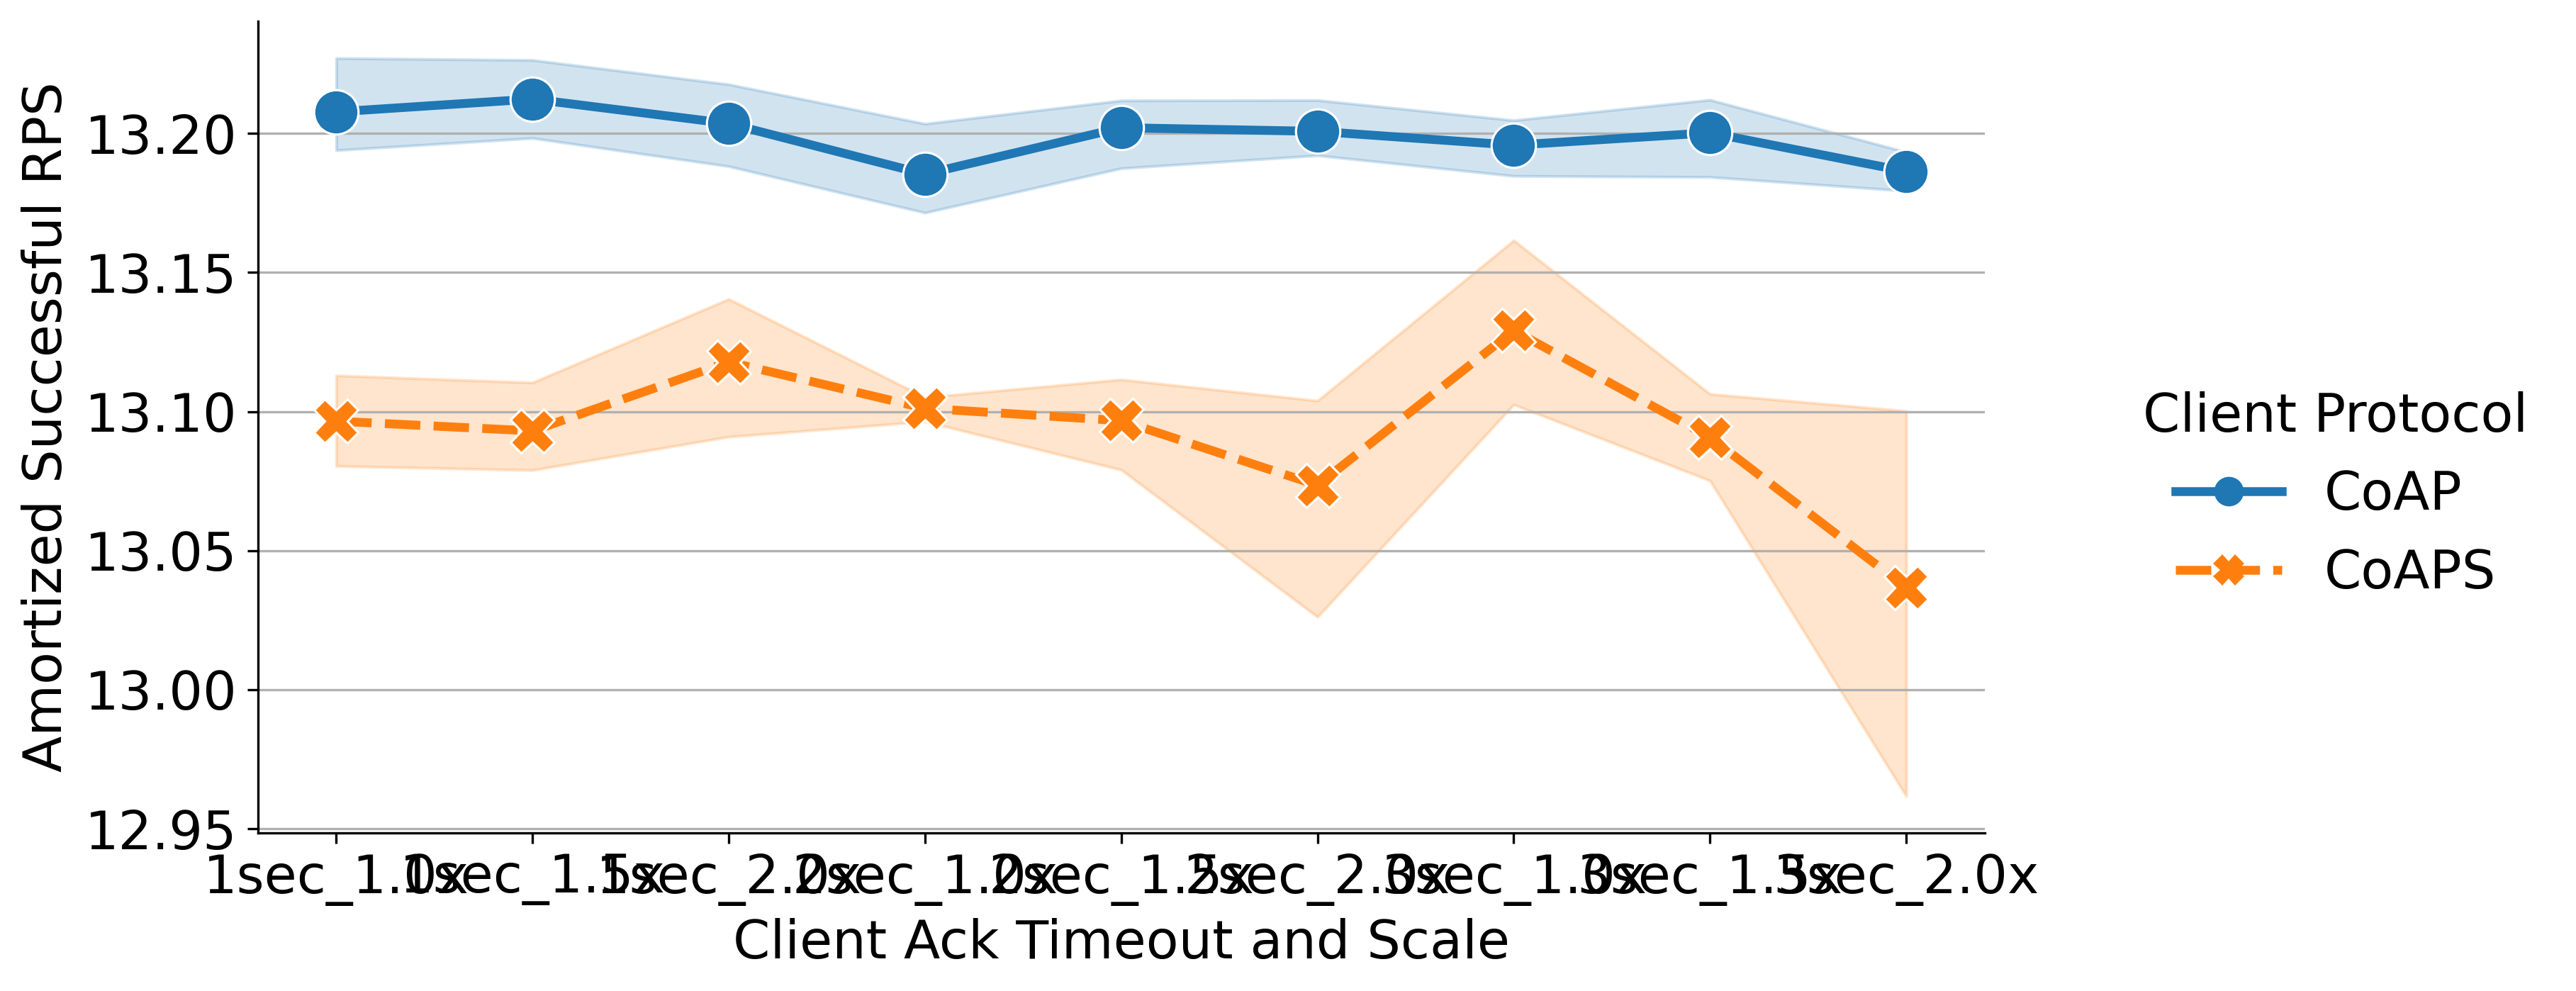

exp_id  \
0   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
2   thesis_group_aggressive_client_8clients___1sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3   thesis_group_aggressive_client_8clients___1sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
4   thesis_group_aggressive_client_8clients___1sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
5   thesis_group_aggressive_client_8clients___1sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
6   thesis_group_aggressive_client_8clients___2sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
7   thesis_group_aggressive_client_8clients___2sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
8   thesis_group_aggressive_client_8clients___2sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
9   thesis_group_aggressive_client_8clients___2sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
10  thesis_group_aggressive_client_8clients___2sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
11  thesis_group_aggressive_client_8clients___2sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
12  thesis_group_aggressive_client_8clients___3sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
13  thesis_group_aggressive_client_8clients___3sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
14  thesis_group_aggressive_client_8clients___3sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
15  thesis_group_aggressive_client_8clients___3sec_ackto_1o5_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
16  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
17  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

   run_proxy_with_dtls  num_clients ack_timeout_and_scale  \
0                 CoAP            8             1sec_1.0x   
1                CoAPS            8             1sec_1.0x   
2                 CoAP            8             1sec_1.5x   
3                CoAPS            8             1sec_1.5x   
4                 CoAP            8             1sec_2.0x   
5                CoAPS            8             1sec_2.0x   
6                 CoAP            8             2sec_1.0x   
7                CoAPS            8             2sec_1.0x   
8                 Co

In [12]:
g = sns.relplot(
  data=df,
  kind="line",
  x="ack_timeout_and_scale",
  y="amortized_successful_rps",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  aspect=2,
  markers=True,
  markersize=15,
)

g.set_xlabels("Client Ack Timeout and Scale")
g.set_ylabels("Amortized Successful RPS")
g.legend.set_title("Client Protocol")

plt.grid(True, axis="y")
plt.show()

_df = (
  df
  .groupby(by=["exp_id", "run_proxy_with_dtls", "num_clients", "ack_timeout_and_scale"])
  .agg(
    mean_amortized_successful_rps=("amortized_successful_rps", "mean"),
  )
  .reset_index()
)
_df["mean_amortized_rps_messages_per_client"] = _df["mean_amortized_successful_rps"] / _df["num_clients"]
_df

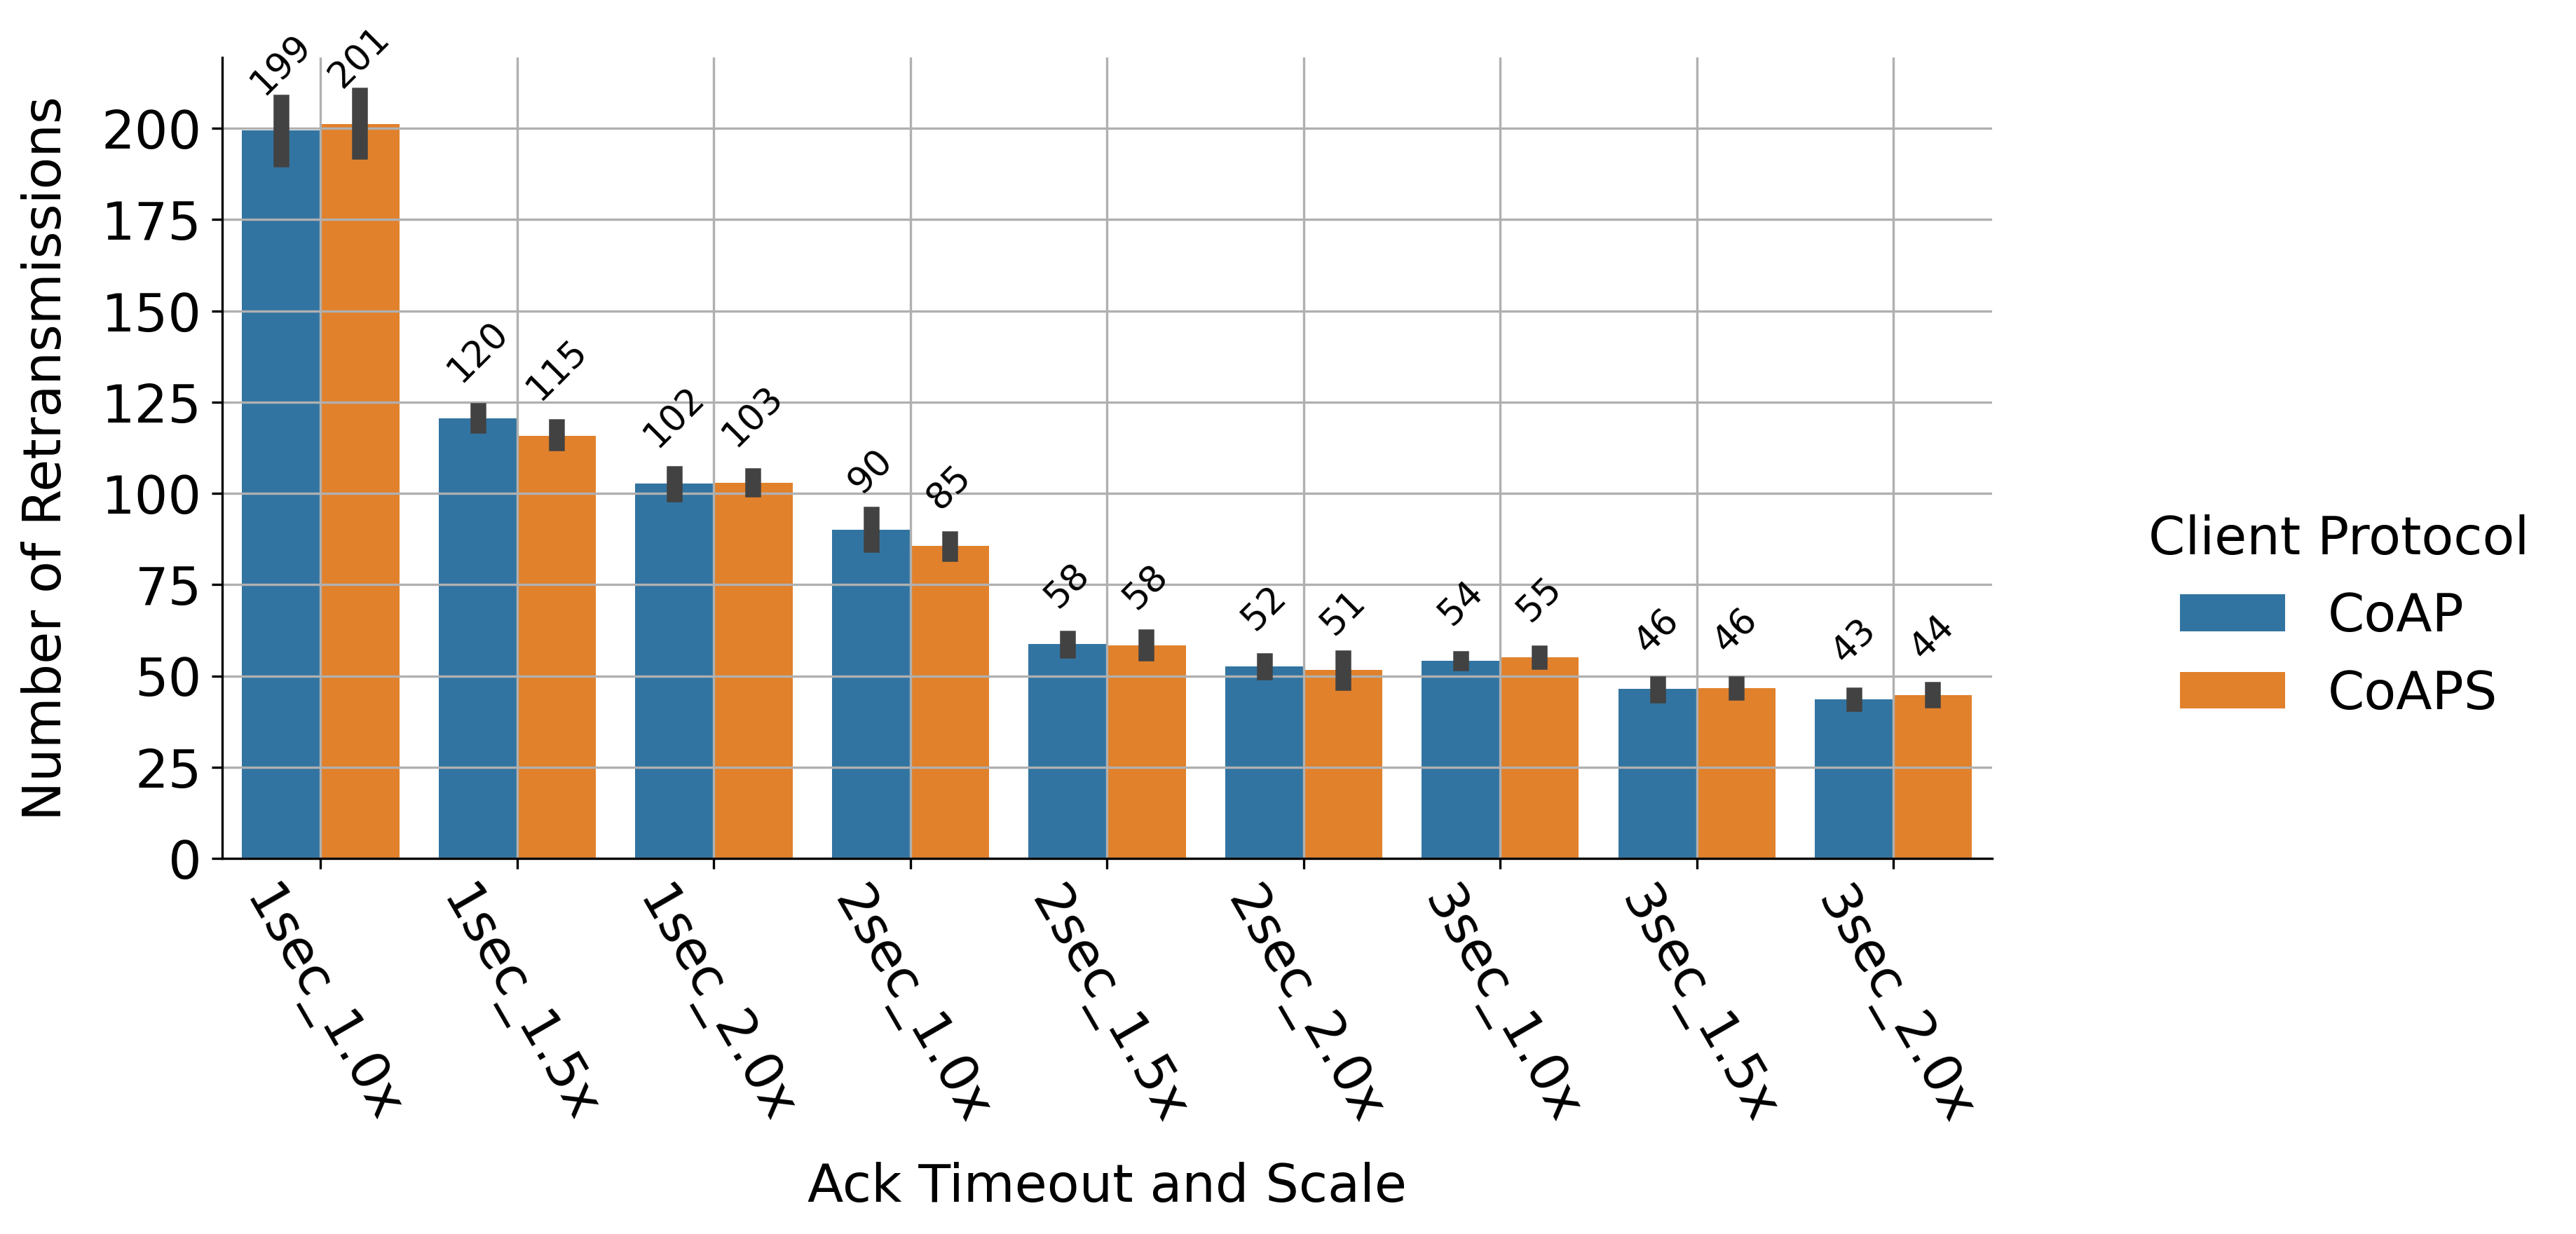

exp_id  \
0   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
..                                                                                                                                                                                     ...   
85  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
86  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
87  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
88  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
89  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

    trial  num_clients run_proxy_with_dtls ack_timeout_and_scale  ack_timeout  \
0       1            8                CoAP             1sec_1.0x            1   
1       2            8                CoAP             1sec_1.0x            1   
2       3            8                CoAP             1sec_1.0x            1   
3       4            8                CoAP             1sec_1.0x            1   
4       5            8                CoAP             1sec_1.0x            1   
..    ...          ...                 ...                   ...          ...   
85      1            8               CoAPS             3sec_2.0x            3   
86      2            8               CoAPS             3sec_2.0x            3   
87      3            8               CoAPS             3sec_2.0x            3   
88      4            8               CoAPS             3sec_2.0x            3   
89      5            8               CoAPS             3sec_2.0x            3   

    ack_scale  total_num_retransmissions  
0         1.0                        211  
1         1.0                        185  
2         1.0                        195  
3         1.0                        208  
4         1.0                        198  
..        ...                        ...  
85        2.0                         42  
86        2.0                         45  
87        2.0                         46  
88        2.0                         44  
89        2.0                         47  

[90 rows x 8 columns]

In [19]:
## Plot retransmissions as a function of clients and protocol.

df = (
  client_rps_df.groupby(by=["exp_id", "trial", "num_clients", "run_proxy_with_dtls", "ack_timeout_and_scale", "ack_timeout", "ack_scale"])
  .agg(
    total_num_retransmissions=("total_num_retransmissions", "sum")
  )
  .reset_index()
)

g = sns.catplot(
  data=df,
  kind="bar",
  x="ack_timeout_and_scale",
  y="total_num_retransmissions",
  hue="run_proxy_with_dtls",
  aspect=2,
)

g.set(
  yticks=np.arange(0,201,25),
)
g.set_xlabels("Ack Timeout and Scale", labelpad=10)
g.set_ylabels("Number of Retransmissions", labelpad=10)

g.legend.set_title("Client Protocol")

ax = g.axes[0,0]
for container in ax.containers:
  ax.bar_label(container, fmt="%d", padding=10, rotation=45, fontsize="x-small")

plt.grid(True, axis="both")
plt.xticks(rotation=-60)
plt.show()

df[df["total_num_retransmissions"] > 0]

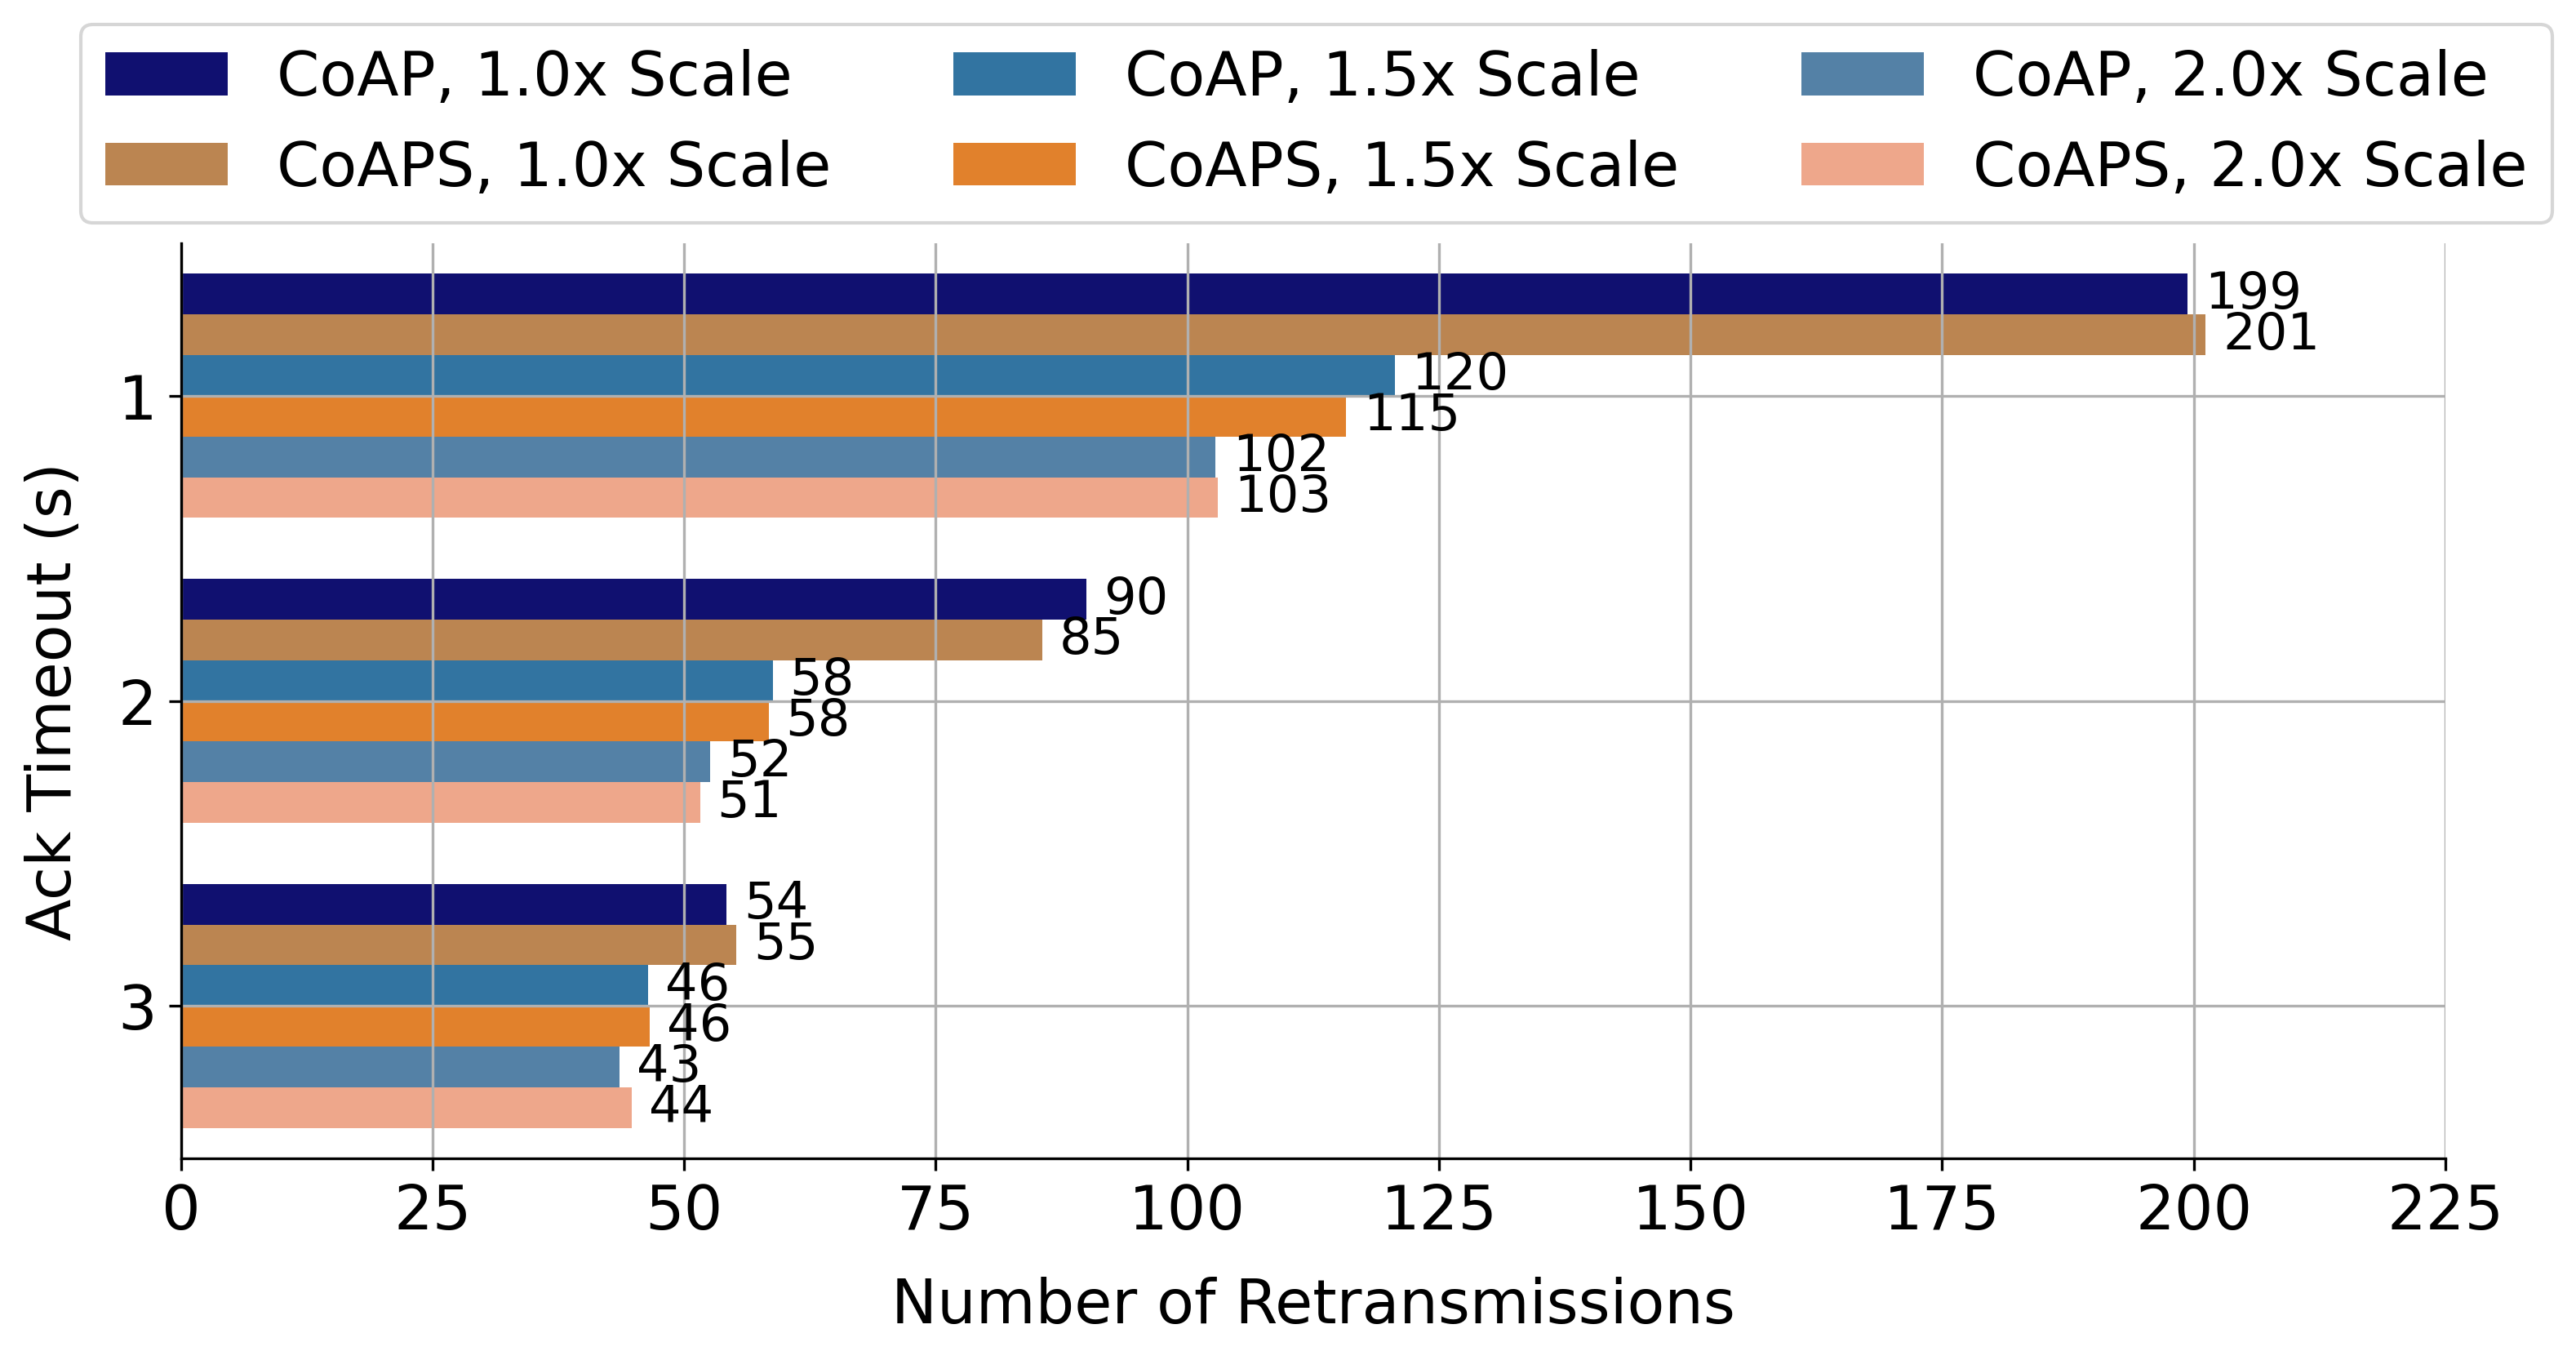

exp_id  \
0   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
..                                                                                                                                                                                     ...   
85  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
86  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
87  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
88  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
89  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

    trial  num_clients run_proxy_with_dtls ack_timeout_and_scale  ack_timeout  \
0       1            8                CoAP             1sec_1.0x            1   
1       2            8                CoAP             1sec_1.0x            1   
2       3            8                CoAP             1sec_1.0x            1   
3       4            8                CoAP             1sec_1.0x            1   
4       5            8                CoAP             1sec_1.0x            1   
..    ...          ...                 ...                   ...          ...   
85      1            8               CoAPS             3sec_2.0x            3   
86      2            8               CoAPS             3sec_2.0x            3   
87      3            8               CoAPS             3sec_2.0x            3   
88      4            8               CoAPS             3sec_2.0x            3   
89      5            8               CoAPS             3sec_2.0x            3   

    ack_scale  total_num_retransmissions client_timeout_combo  
0         1.0                        211     CoAP, 1.0x Scale  
1         1.0                        185     CoAP, 1.0x Scale  
2         1.0                        195     CoAP, 1.0x Scale  
3         1.0                        208     CoAP, 1.0x Scale  
4         1.0                        198     CoAP, 1.0x Scale  
..        ...                        ...                  ...  
85        2.0                         42    CoAPS, 2.0x Scale  
86        2.0                         45    CoAPS, 2.0x Scale  
87        2.0                         46    CoAPS, 2.0x Scale  
88        2.0                         44    CoAPS, 2.0x Scale  
89        2.0                         47    CoAPS, 2.0x Scale  

[90 rows x 9 columns]

In [48]:
## Plot retransmissions as a function of clients and protocol.

df = (
  client_rps_df.groupby(by=["exp_id", "trial", "num_clients", "run_proxy_with_dtls", "ack_timeout_and_scale", "ack_timeout", "ack_scale"])
  .agg(
    total_num_retransmissions=("total_num_retransmissions", "sum")
  )
  .reset_index()
)
df["client_timeout_combo"] = df["run_proxy_with_dtls"].astype(str) + ", " + df["ack_scale"].astype(str) + "x Scale"

g = sns.catplot(
  data=df,
  kind="bar",
  y="ack_timeout",
  x="total_num_retransmissions",
  hue="client_timeout_combo",
  palette=sns.color_palette(["navy", "peru", "tab:blue", "tab:orange", "steelblue", "lightsalmon"]),
  orient="h",
  aspect=1.5,
  ci=False,
)

g.set(
  xticks=np.arange(0,231,25),
)
g.set_ylabels("Ack Timeout (s)", labelpad=10)
g.set_xlabels("Number of Retransmissions", labelpad=10)

g.legend.set_title("")

ax = g.axes[0,0]
for container in ax.containers:
  ax.bar_label(container, fmt="%d", padding=5, fontsize="small")

sns.move_legend(
  g,
  "upper center",
  bbox_to_anchor=(0.52, 1.15),
  ncol=3,
  title=None,
  frameon=True,
)

plt.tight_layout()
plt.grid(True, axis="both")
plt.show()

df[df["total_num_retransmissions"] > 0]

In [14]:
%%time

## Determine transaction success rate

# Combine send and receive events for clients.
client_events_df = client_sends_df.merge(client_recvs_df, on=["exp_id", "trial", "observer_id", "message_marker"], how="left")
client_events_df.rename(columns={
  "observe_timestamp_x": "send_timestamp",
  "observe_timestamp_y": "recv_timestamp",
}, inplace=True)
client_events_df["rtt_ms"] = 1e3 * (client_events_df["recv_timestamp"] - client_events_df["send_timestamp"])

# Edge case: sometimes clients will not receive a
# response back at the end of the experiment, so
# we ignore those messages, if any.
grouped_last_nan_indicies_to_remove = (
  client_events_df.reset_index()[
    client_events_df["recv_timestamp"].isna()
  ]
  .groupby(by=["exp_id", "trial", "observer_id", "message_marker"])
  .agg(
    last_nan_recv_timestamp=("recv_timestamp", "last"),
    original_index=("index", "last"),
  )
  .reset_index()
  ["original_index"]
  .unique()
)
client_events_df.drop(index=grouped_last_nan_indicies_to_remove, inplace=True)
client_events_df.reset_index(inplace=True)
client_events_df.drop(columns=["index"], inplace=True)

# Produce the total number of messages, and number 
# messages with a matching successful response.
grouped_client_events_df = (
  client_events_df
  .groupby(["exp_id", "trial", "observer_id"])
  .agg(
    unique_message_markers=("message_marker", "nunique"),
    num_successful_messages=("successful_message", "sum"),
  )
  .reset_index()
)

# Now compute the successful transaction rate.
grouped_client_events_df["transaction_success_rate"] = 100 * grouped_client_events_df["num_successful_messages"] / grouped_client_events_df["unique_message_markers"]

grouped_client_events_df = (
  grouped_client_events_df
  .merge(exp_df, on="exp_id", how="left")
  .replace({
    "run_proxy_with_dtls": {
      True : "CoAPS",
      False: "CoAP",
    },
  })
)

grouped_client_events_df

CPU times: user 3.61 s, sys: 259 ms, total: 3.87 s
Wall time: 3.87 s


exp_id  \
0    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
..                                                                                                                                                                                      ...   
715  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
716  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
717  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
718  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
719  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

     trial observer_id  unique_message_markers num_successful_messages  \
0        1     client1                    1568                    1563   
1        1     client2                    1577                    1578   
2        1     client3                    1577                    1573   
3        1     client4                    1578                    1576   
4        1     client5                    1579                    1575   
..     ...         ...                     ...                     ...   
715      5     client4                    1559                    1557   
716      5     client5                    1562                    1558   
717      5     client6                    1559                    1563   
718      5     client7                    1563                    1561   
719      5     client8                    1564                    1562   

    transaction_success_rate attacker_rate  server_connections  \
0                  99.681122       100mbps                 256   
1                 100.063412       100mbps                 256   
2                  99.746354       100mbps                 256   
3                  99.873257       100mbps                 256   
4                  99.746675       100mbps                 256   
..                       ...           ...                 ...   
715                99.871713       100mbps                 256   
716                99.743918       100mbps                 256   
717               100.256575       100mbps                 256   
718                99.872041       100mbps                 256   
719                99.872123       100mbps                 256   

     max_keep_alive_requests  num_clients  ...  max_retries  \
0                          0            8  ...            2   
1                          0            8  ...            2   
2                

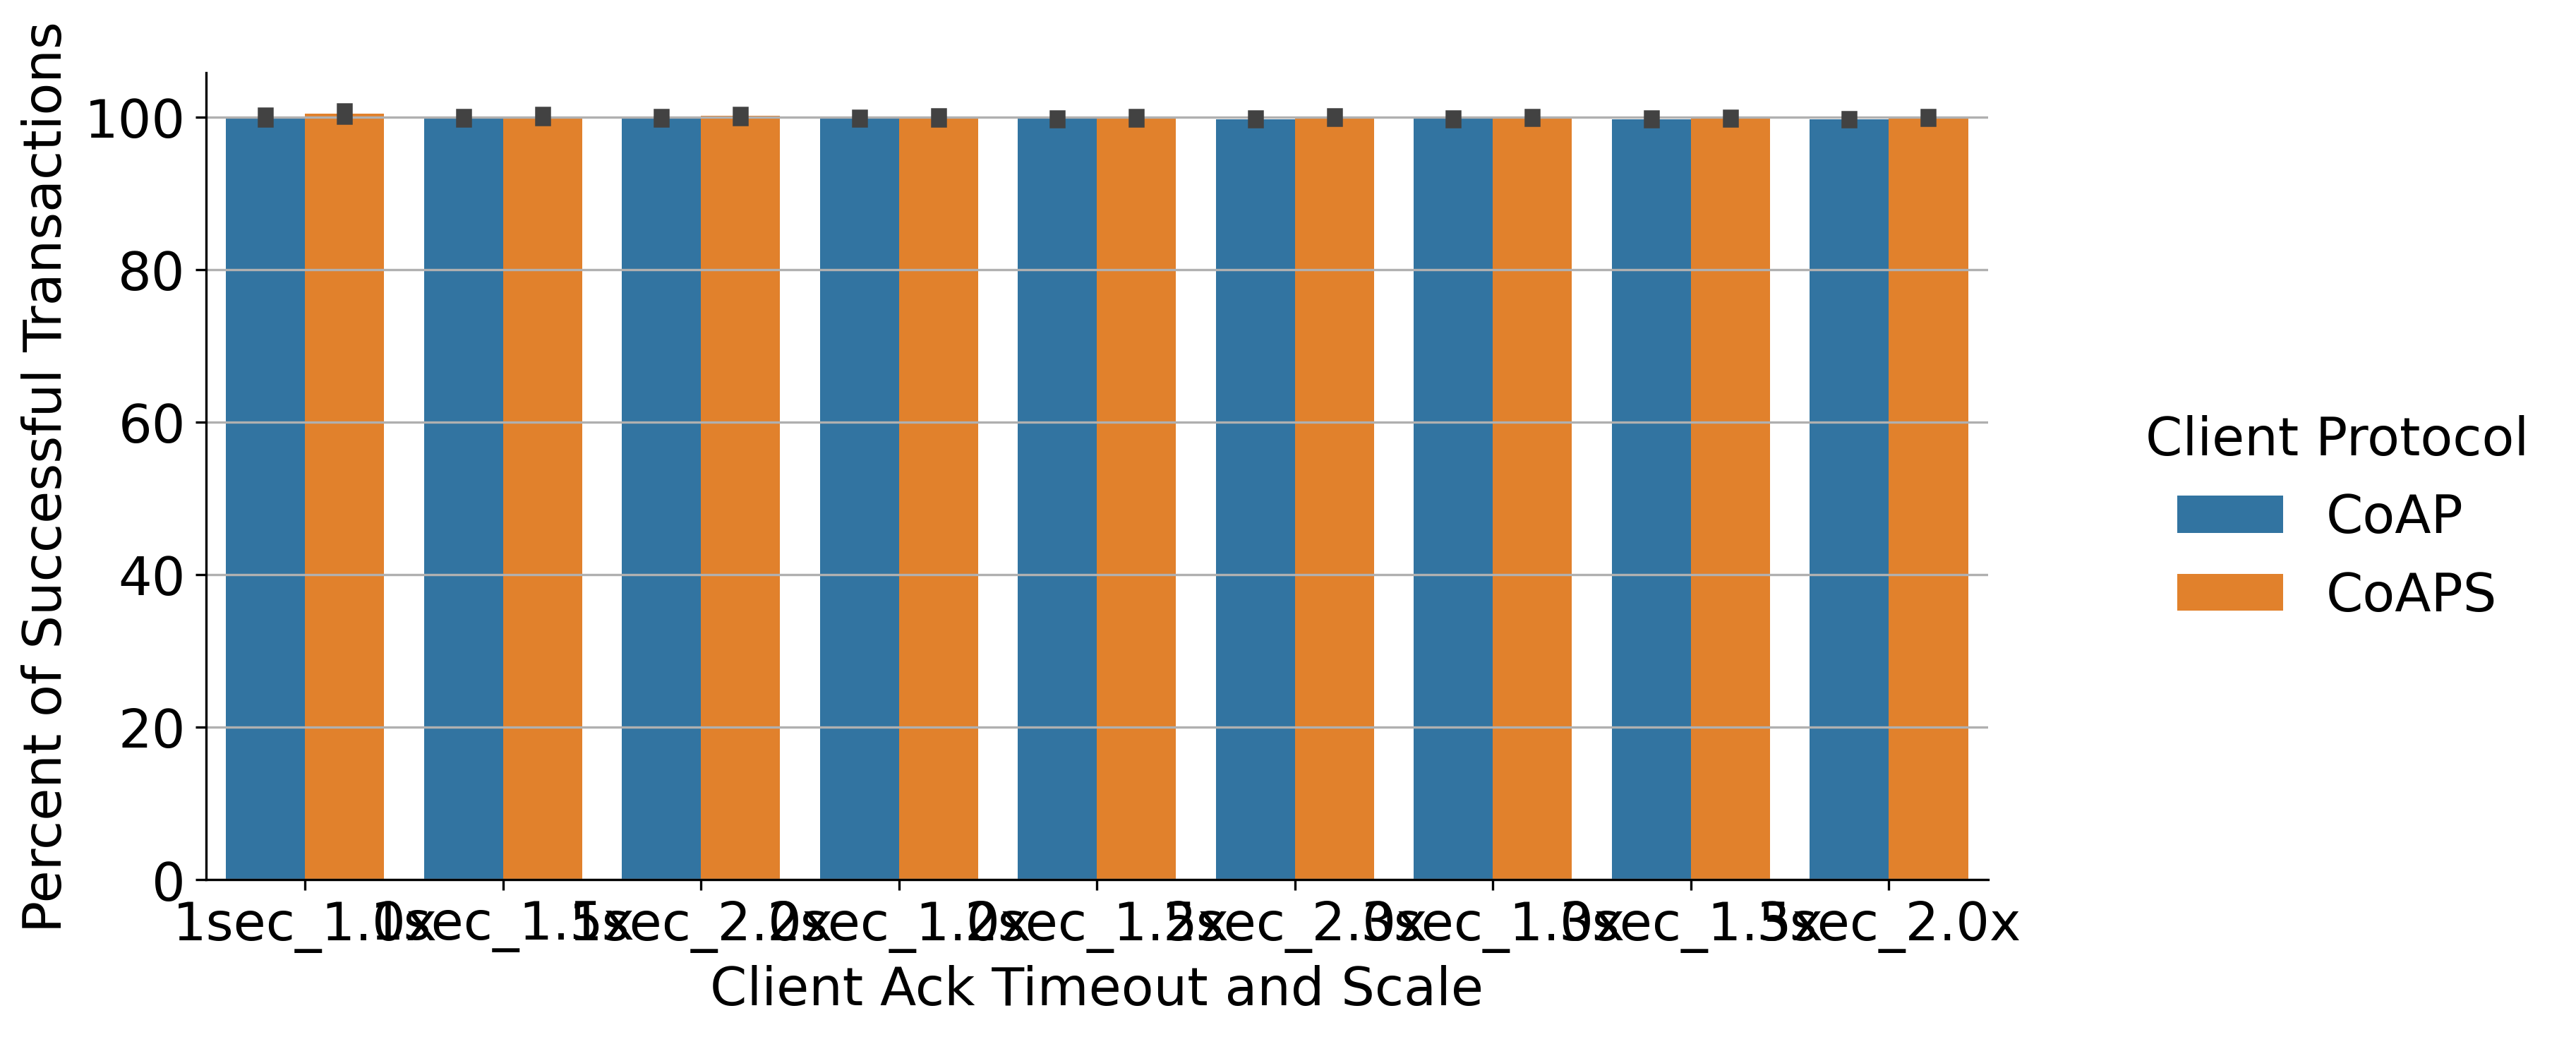

exp_id  \
0    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
5    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
..                                                                                                                                                                                      ...   
713  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
715  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
716  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
718  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
719  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

     trial observer_id  unique_message_markers num_successful_messages  \
0        1     client1                    1568                    1563   
2        1     client3                    1577                    1573   
3        1     client4                    1578                    1576   
4        1     client5                    1579                    1575   
5        1     client6                    1577                    1574   
..     ...         ...                     ...                     ...   
713      5     client2                    1559                    1557   
715      5     client4                    1559                    1557   
716      5     client5                    1562                    1558   
718      5     client7                    1563                    1561   
719      5     client8                    1564                    1562   

    transaction_success_rate attacker_rate  server_connections  \
0                  99.681122       100mbps                 256   
2                  99.746354       100mbps                 256   
3                  99.873257       100mbps                 256   
4                  99.746675       100mbps                 256   
5                  99.809765       100mbps                 256   
..                       ...           ...                 ...   
713                99.871713       100mbps                 256   
715                99.871713       100mbps                 256   
716                99.743918       100mbps                 256   
718                99.872041       100mbps                 256   
719                99.872123       100mbps                 256   

     max_keep_alive_requests  num_clients  ...  max_retries  \
0                          0            8  ...            2   
2                          0            8  ...            2   
3                

In [ ]:
df = grouped_client_events_df

g = sns.catplot(
  data=df,
  kind="bar",
  x="ack_timeout_and_scale",
  y="transaction_success_rate",
  hue="run_proxy_with_dtls",
  ci="sd",
  aspect=2,
)

g.set_xlabels("Client Ack Timeout and Scale")
g.set_ylabels("Percent of Successful Transactions")
g.legend.set_title("Client Protocol")

plt.grid(True, axis="y")
plt.show()

grouped_client_events_df[
  grouped_client_events_df["transaction_success_rate"] < 100
]

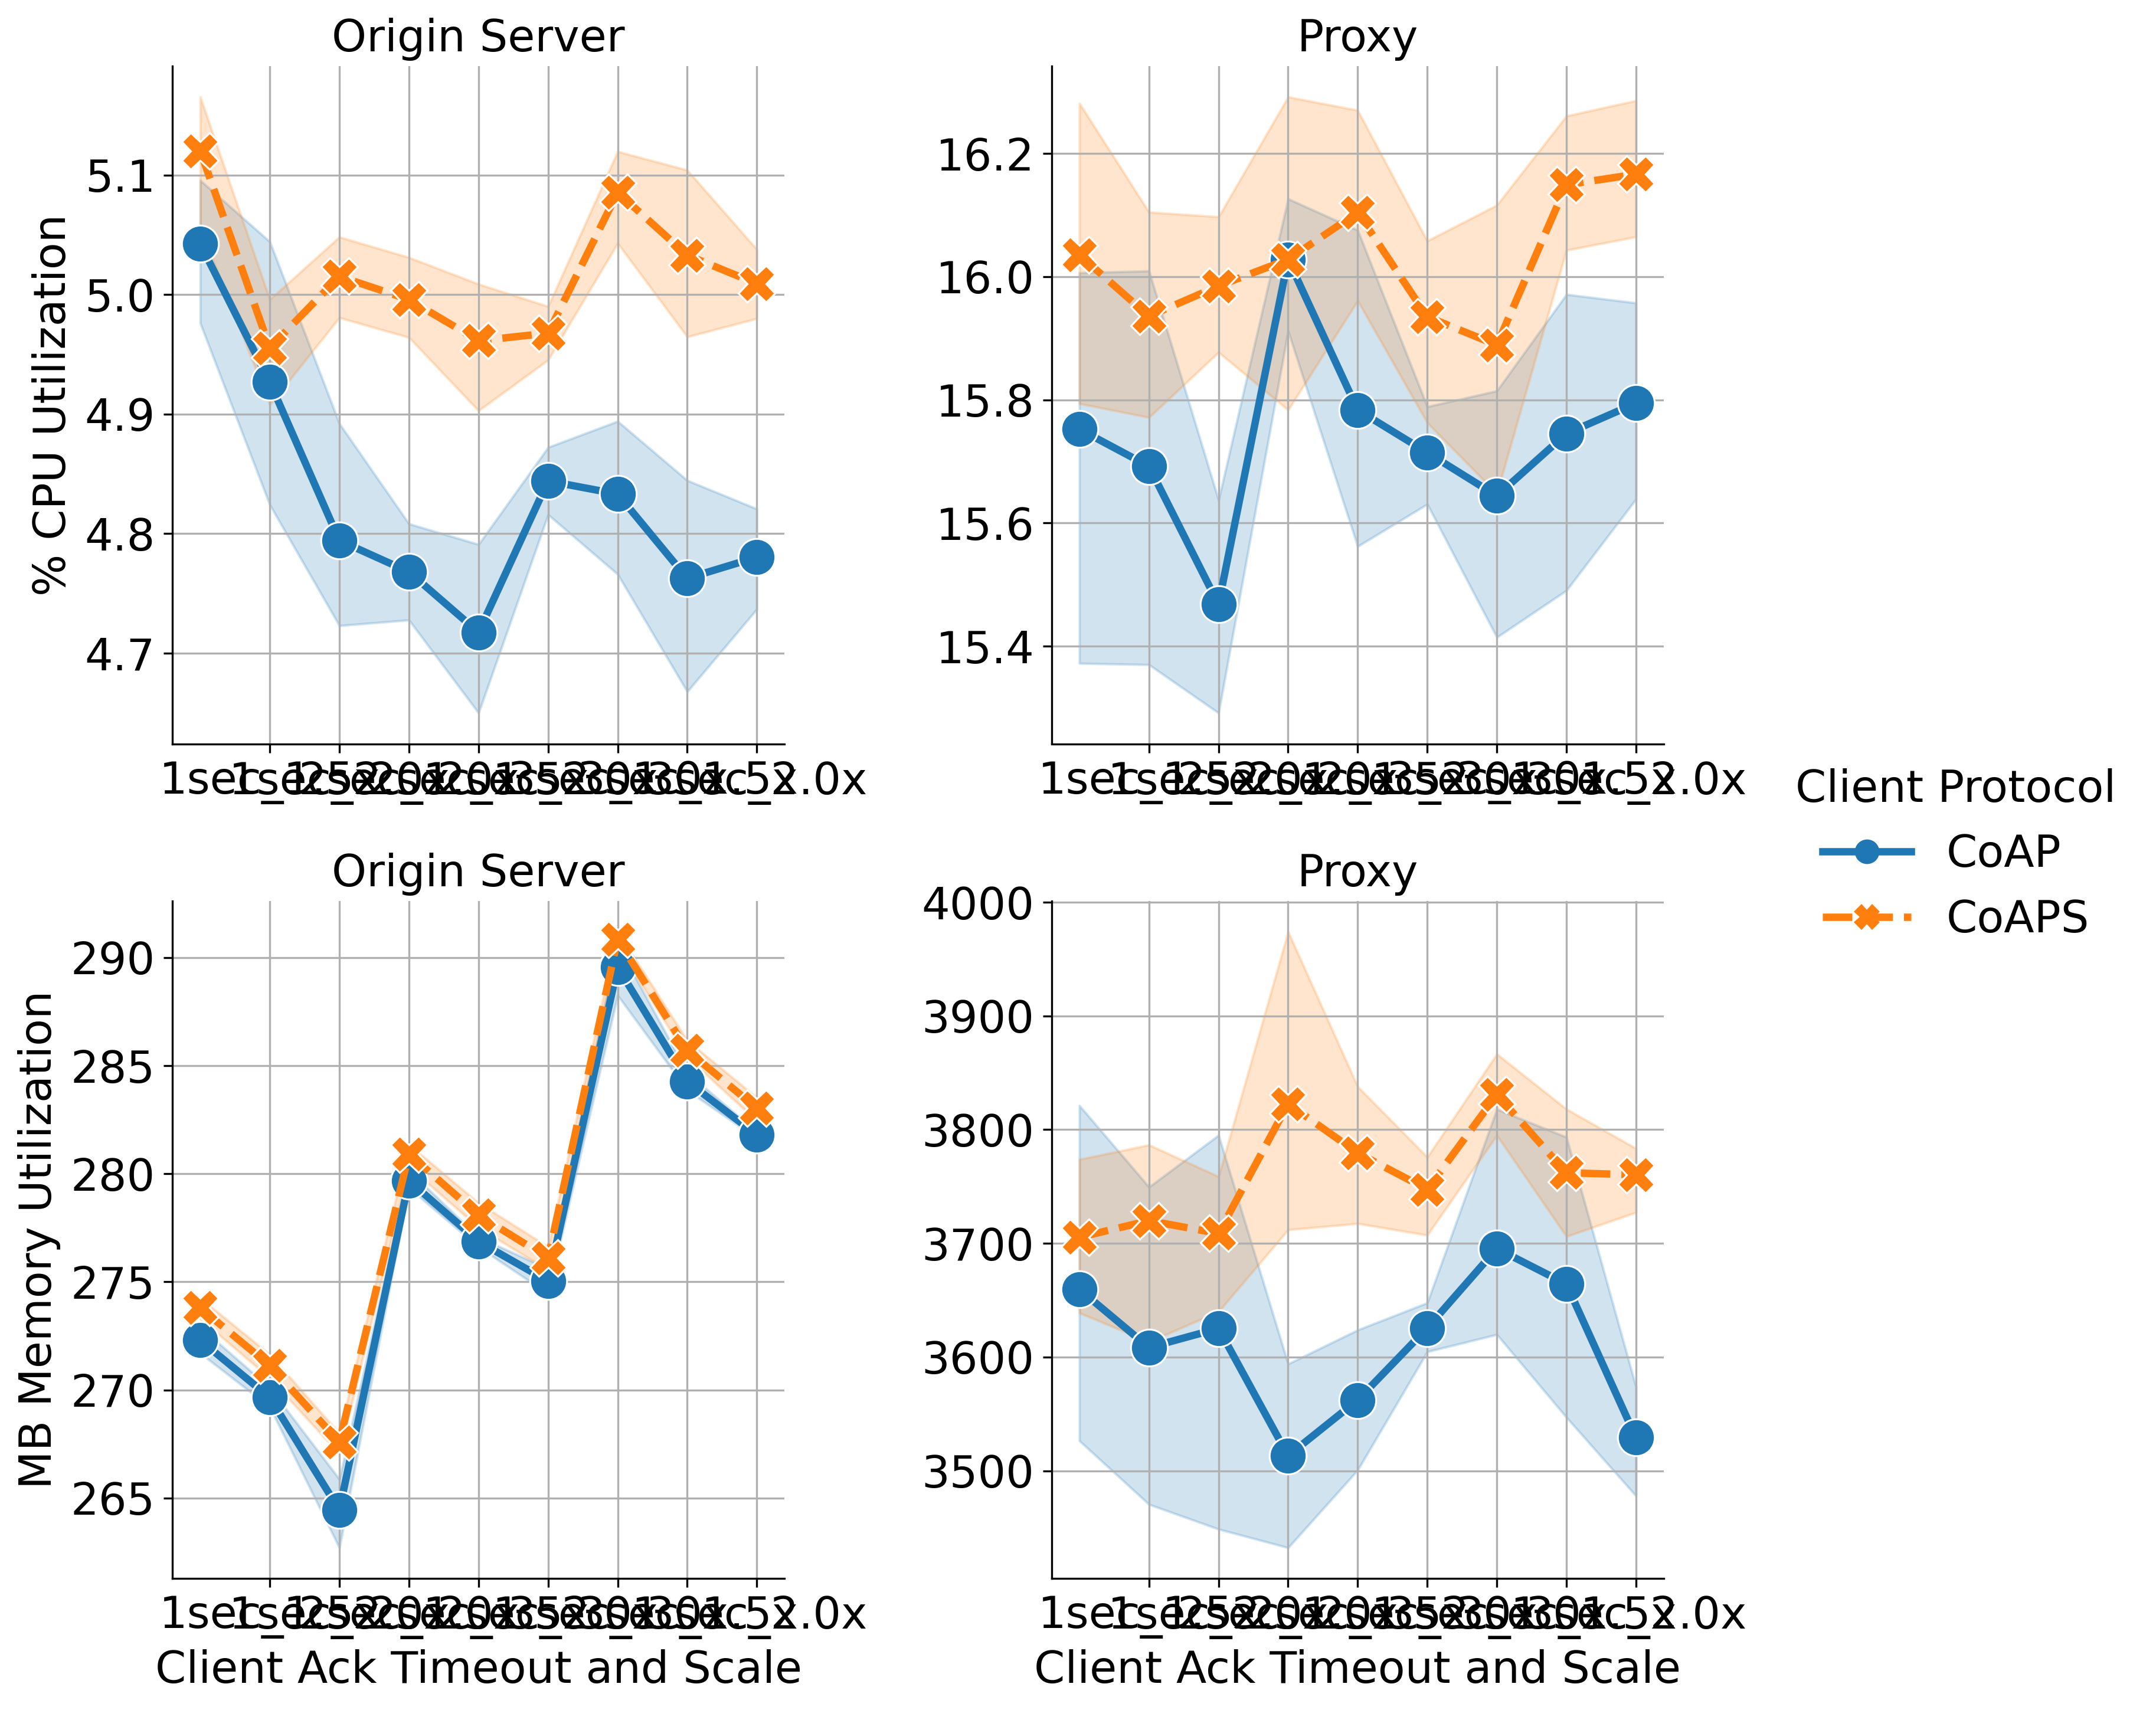

CPU times: user 5.74 s, sys: 462 ms, total: 6.2 s
Wall time: 6.15 s


exp_id  \
0    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4    thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
..                                                                                                                                                                                      ...   
355  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
356  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
357  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
358  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
359  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

     trial    observer_id            metric_type    avg_value  min_value  \
0        1  Origin Server      % CPU Utilization     4.934286        0.4   
1        1          Proxy      % CPU Utilization    16.137857        0.4   
2        1  Origin Server  MB Memory Utilization   271.309091      249.0   
3        1          Proxy  MB Memory Utilization  3659.088333      254.0   
4        2  Origin Server      % CPU Utilization     5.000714        0.5   
..     ...            ...                    ...          ...        ...   
355      4          Proxy  MB Memory Utilization  3773.459866      255.0   
356      5  Origin Server      % CPU Utilization     5.035000        0.5   
357      5          Proxy      % CPU Utilization    16.048571        0.5   
358      5  Origin Server  MB Memory Utilization   283.671074      261.0   
359      5          Proxy  MB Memory Utilization  3698.919866      256.0   

     max_value attacker_rate  server_connections  max_keep_alive_requests  \
0         21.0       100mbps                 256                        0   
1         88.6       100mbps                 256                        0   
2        292.0       100mbps                 256                        0   
3       6031.0       100mbps                 256                        0   
4         20.4       100mbps                 256                        0   
..         ...           ...                 ...                      ...   
355     6257.0       100mbps                 256                        0   
356       21.0       100mbps                 256                        0   
357       88.3       100mbps                 256                        0   
358      308.0       100mbps                 256                        0   
359     6131.0       100mbps                 256                        0   

     ...  max_retries  keep_alive_duration  reques

In [ ]:
%%time

## Measure proxy and server metrics.

df = (
  metric_df.replace({
    "metric_type": {
      "cpu_utilization": "% CPU Utilization",
      "memory_utilization": "MB Memory Utilization",
    },
    "observer_id": {
      "proxy": "Proxy",
      "originserver": "Origin Server",
    },
  })
)

g = sns.relplot(
  data=df,
  kind="line",
  x="ack_timeout_and_scale",
  y="avg_value",
  col="observer_id",
  row="metric_type",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  markers=True,
  markersize=15,
  facet_kws={
    "sharey": False,
    "sharex": False,
  },
)

g.set_titles(
  template="{col_name}",
  col_template="{col_name}",
  row_template="{row_name}",
)
g.set_xlabels("Client Ack Timeout and Scale")
g.set_ylabels("Average Metric Value")
g.legend.set_title("Client Protocol")
g.set(xticks=np.arange(1,9,1))

g.axes[0,0].set_ylabel("% CPU Utilization")
g.axes[0,1].set_ylabel("")
# g.axes[0,0].set_ylim(0,4)
# g.axes[0,1].set_ylim(0,4)

g.axes[1,0].set_ylabel("MB Memory Utilization")
g.axes[1,1].set_ylabel("")
# g.axes[1,0].set_ylim(250, 500)
# g.axes[1,1].set_ylim(250, 500)

g.axes[0,0].grid(True, axis="both")
g.axes[0,1].grid(True, axis="both")
g.axes[1,0].grid(True, axis="both")
g.axes[1,1].grid(True, axis="both")

# fig.tight_layout(pad=0.5)

plt.show()

df

In [ ]:
%%time

## Measure proxy and server connection management.
##
## We currently do not insert connection events to
## the database, so we have to read from the processed
## connection files.

ALL_EXPERIMENTS_DATA_HOME = "/home/ubuntu/dos-californium/deter/expdata/real/final"

def read_exp_trial_node_connections(exp_id):
  """
  Read all processed connection dumps in an experiment `exp_id`.
  """
  experiment_dir = os.path.join(ALL_EXPERIMENTS_DATA_HOME, exp_id)

  df = (
    pl
    .scan_parquet(
      f"{experiment_dir}/*/{exp_id}.connections.parquet"
    )
  )
  lazy_dfs.append(df)

lazy_dfs = list()
for exp_id in exp_df["exp_id"].unique():
  read_exp_trial_node_connections(exp_id)

connections_df = (
  pl
  .concat(lazy_dfs)

  # Filter for proxy's view of syn-acks or fin-acks coming from server
  .filter(
    (pl.col("observer_id") == "proxy")
    & ((pl.col("is_syn") == 1) | (pl.col("is_fin") == 1))
    & (pl.col("info").str.contains(", ACK]"))
    & (pl.col("src_port") == 443)
  )
  # Group by experiment, trial, and observer, then accummulate
  # syn-acks and fin-acks in a list, along with their corresponding
  # timestamps of occurrence for each group.
  .groupby(
    by=["exp_id", "trial", "observer_id"],
    maintain_order=True
  )
  .agg([
    pl.col("timestamp").alias("timestamp"),
    pl.col("is_syn").cumsum().alias("cum_syn"),
    pl.col("is_fin").cumsum().alias("cum_fin"),
  ])
  # Explode the cumulative syns and fins, and their times, then
  # subtract them to get a view of how many open connections there
  # are in the experiment as a function of time
  .explode(columns=["timestamp", "cum_syn", "cum_fin"])
  .with_columns([
    (pl.col("cum_syn") - pl.col("cum_fin")).alias("open_connections")
  ])

  # And finally convert to pandas for plotting.
  .collect()
  .to_pandas()
)

# This method of counting does not include the original 0 connections
# at time 0 for each node in each trial -- so we add that manually.
records = list()
for e in connections_df["exp_id"].unique():
  for t in connections_df["trial"].unique():
    for o in connections_df["observer_id"].unique():
      records.append({
        "exp_id"          : e,
        "trial"           : t,
        "observer_id"     : o,
        "timestamp"       : 0.0,
        "cum_syn"         : 0,
        "cum_fin"         : 0,
        "open_connections": 0,
      })
connections_df = (
  pd.concat(
    [connections_df, pd.DataFrame.from_records(records)]
  )
  .sort_values(by=["exp_id", "trial", "observer_id", "timestamp"])
)

# This method also does not include a connection count at the last time
# the proxy is meant to be active -- so we fill that value in based on the
# last value.
last_connection_df = (
  connections_df
  .groupby(by=["exp_id", "trial", "observer_id"], sort=True)
  .agg(
    max_timestamp=("timestamp", "max"),
    last_timestamp=("timestamp", "last"),
    max_open_connections=("open_connections", "max"),
    last_open_connections=("open_connections", "last"),
    last_cum_syn=("cum_syn", "last"),
    last_cum_fin=("cum_fin", "last"),
  )
  .reset_index()
)
# assert last_connection_df["max_timestamp"].equals(last_connection_df["last_timestamp"])
# assert last_connection_df["max_open_connections"].equals(last_connection_df["last_open_connections"])
records = list()
for r in last_connection_df.to_dict(orient="records"):
  records.append({
    "exp_id"          : r["exp_id"],
    "trial"           : r["trial"],
    "observer_id"     : r["observer_id"],
    "timestamp"       : 140,
    "cum_syn"         : r["last_cum_syn"],
    "cum_fin"         : r["last_cum_fin"],
    "open_connections": r["last_open_connections"],
  })
connections_df = (
  pd.concat(
    [connections_df, pd.DataFrame.from_records(records)]
  )
  .sort_values(by=["exp_id", "trial", "observer_id", "timestamp"])
)

connections_df = (
  connections_df
  .merge(exp_df, on="exp_id", how="left")
  .replace({
    "run_proxy_with_dtls": {
      True : "CoAPS",
      False: "CoAP",
    },
  })
)

connections_df

ComputeError: no matching files found

In [ ]:
%%time

## Measure proxy and server connection management.

df = connections_df

plt.rcParams['font.size'] = '25'

g = sns.relplot(
  data=df,
  kind="line",
  x="timestamp",
  y="open_connections",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  col="ack_timeout_and_scale",
  col_wrap=2,
  markers=True,
  markersize=20,
  facet_kws={
    "sharey": True,
    "sharex": True,
  },
  aspect=2,
)
g.set_xlabels("Timestamp in Seconds")
g.set_ylabels("Open Connections", labelpad=20)
g.legend.set_title("Client Protocol")
# g.set(yticks=np.arange(1,9,1))
# for i in range(8):
#   g.axes[i].grid(True, axis="both")

plt.show()

CPU times: user 12.9 s, sys: 648 ms, total: 13.5 s
Wall time: 13.2 s


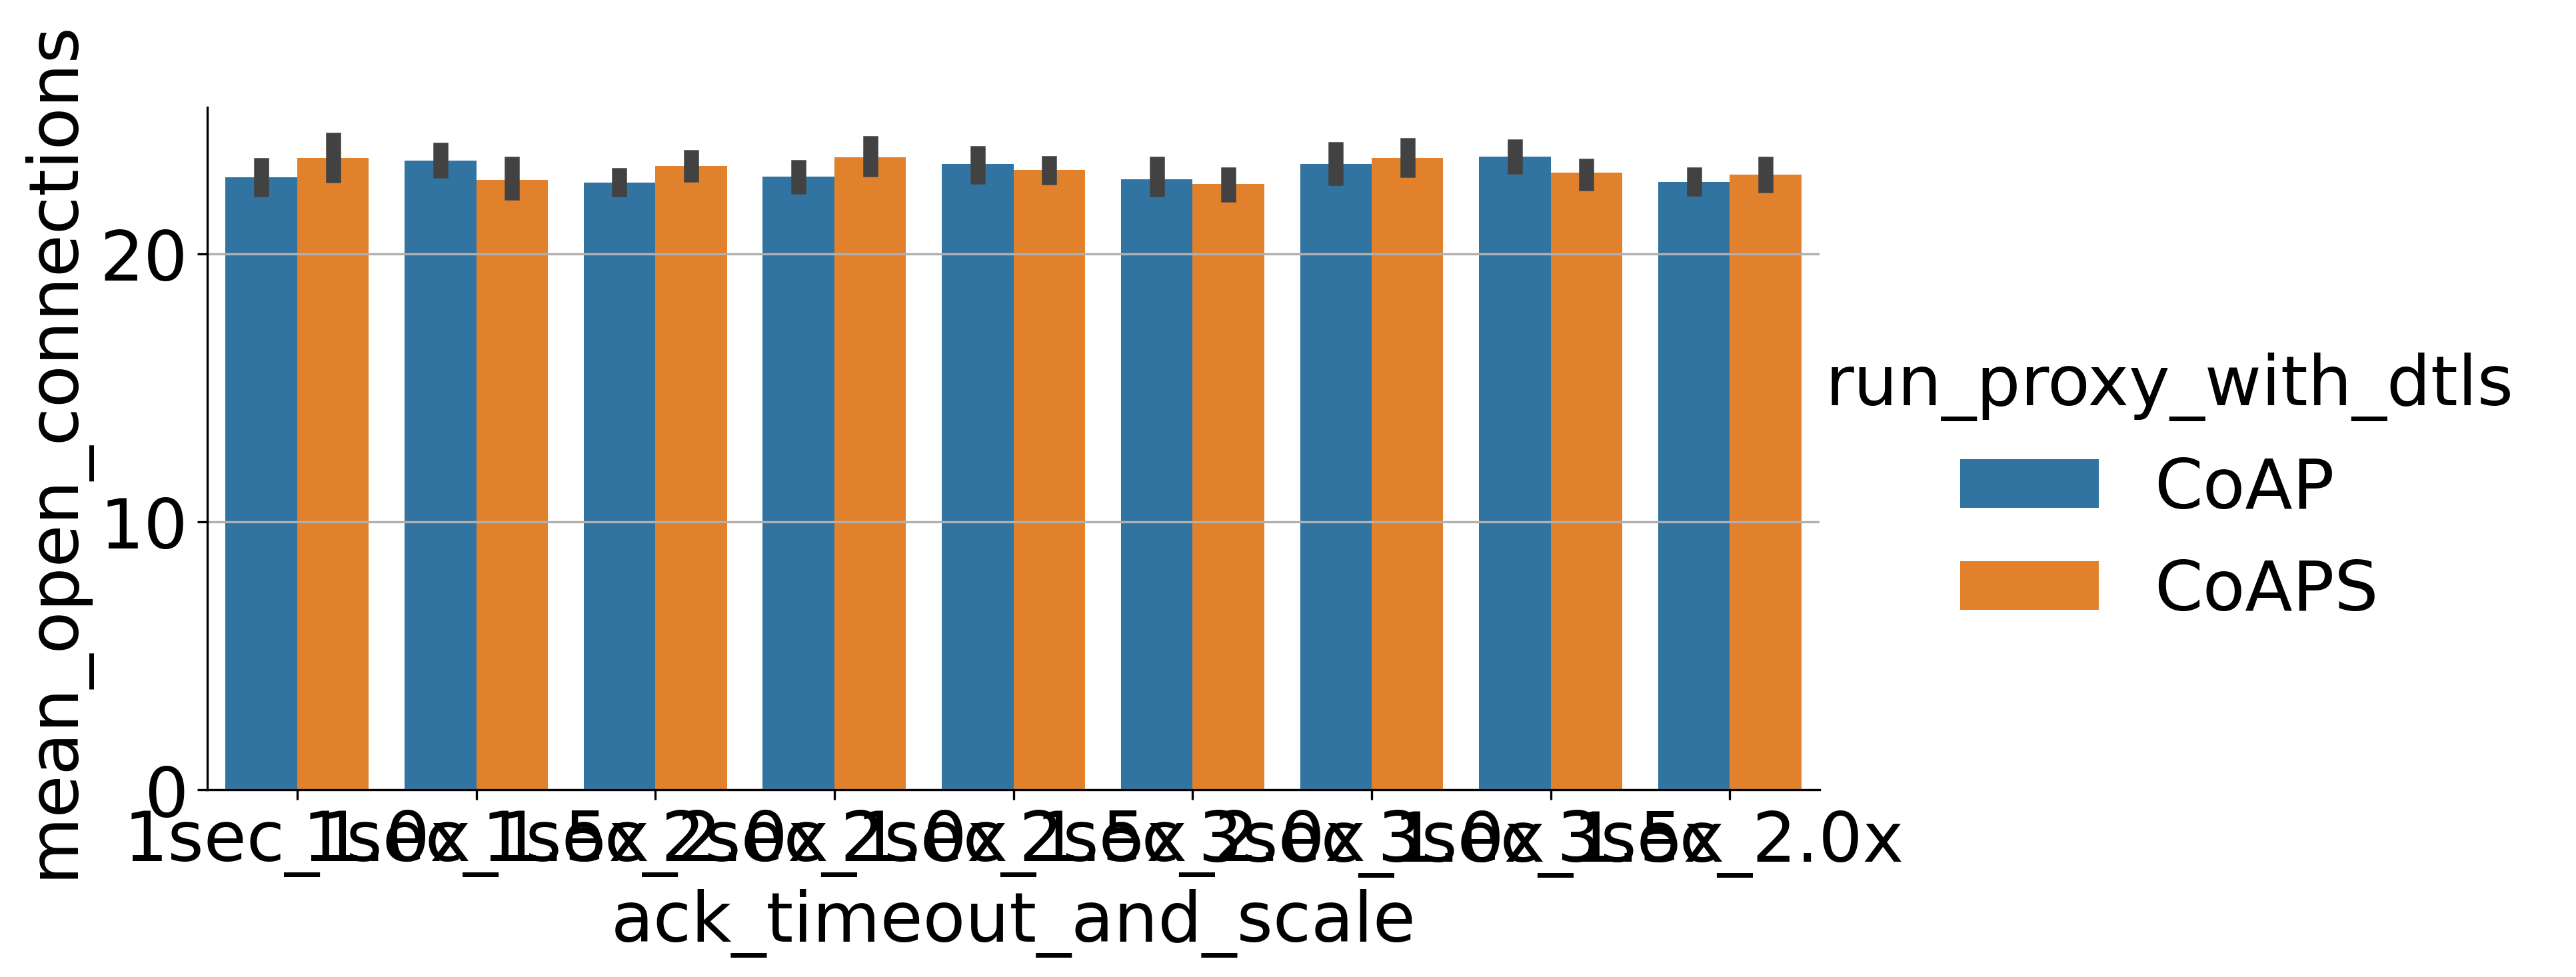

CPU times: user 1.85 s, sys: 153 ms, total: 2 s
Wall time: 1.69 s


exp_id  \
0   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4   thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
..                                                                                                                                                                                     ...   
85  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
86  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
87  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
88  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
89  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

    trial observer_id  num_clients ack_timeout_and_scale run_proxy_with_dtls  \
0       1       proxy            8             1sec_1.0x                CoAP   
1       2       proxy            8             1sec_1.0x                CoAP   
2       3       proxy            8             1sec_1.0x                CoAP   
3       4       proxy            8             1sec_1.0x                CoAP   
4       5       proxy            8             1sec_1.0x                CoAP   
..    ...         ...          ...                   ...                 ...   
85      1       proxy            8             3sec_2.0x               CoAPS   
86      2       proxy            8             3sec_2.0x               CoAPS   
87      3       proxy            8             3sec_2.0x               CoAPS   
88      4       proxy            8             3sec_2.0x               CoAPS   
89      5       proxy            8             3sec_2.0x               CoAPS   

    mean_open_connections  
0               22.543860  
1               22.284483  
2               23.509259  
3               23.398148  
4               22.456140  
..                    ...  
85              23.527778  
86              23.254545  
87              22.614035  
88              23.218182  
89              22.181034  

[90 rows x 7 columns]

In [ ]:
%%time

df = (
  connections_df
  .groupby(by=["exp_id", "trial", "observer_id", "num_clients", 'ack_timeout_and_scale', "run_proxy_with_dtls"])
  .agg(
    mean_open_connections=("open_connections", "mean"),
  )
  .reset_index()
)

g = sns.catplot(
  data=df,
  kind="bar",
  x="ack_timeout_and_scale",
  y="mean_open_connections",
  hue="run_proxy_with_dtls",
  aspect=2,
)

plt.grid(True, axis="y")
plt.show()

df

In [ ]:
%%time 

client_journey_sql = f"""
WITH client_sends AS (
  SELECT
  dn.exp_id AS exp_id,
  e.observer_id AS observer_id,
  e.observe_timestamp AS observe_timestamp,
  e.trial AS trial,
  e.message_marker AS message_marker
  FROM event e
  JOIN message m ON m.message_id = e.message_id
  JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
  AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
),

proxy_events AS (
  SELECT
  dn.exp_id AS exp_id,
  e.observe_timestamp AS observe_timestamp,
  e.trial AS trial,
  e.message_marker AS message_marker
  FROM event e
  JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE e.observer_id IN ({','.join(map(str, proxy_dnids))})   -- proxy dnids
),

client_recvs AS (
  SELECT
  dn.exp_id AS exp_id,
  e.observer_id AS observer_id,
  e.observe_timestamp AS observe_timestamp,
  e.trial AS trial,
  e.message_marker AS message_marker,
  cm.coap_code AS coap_code
  FROM event e
  JOIN message m ON m.message_id = e.message_id
  JOIN coap_message cm ON cm.cmci = m.coap_message
  JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
  AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT
  client_sends.exp_id AS exp_id,
  client_sends.observer_id AS observer_id,
  client_sends.trial AS trial,
  client_sends.message_marker AS message_marker,
  (groupArray(client_recvs.coap_code))[1] AS coap_code,
  MIN(client_sends.observe_timestamp) AS first_send_time_sec,
  abs(1e3 * (MIN(proxy_events.observe_timestamp) - MIN(client_sends.observe_timestamp))) AS client_to_proxy_ms,
  1e3 * (MAX(client_recvs.observe_timestamp) - MIN(proxy_events.observe_timestamp)) AS proxy_to_client_ms,
  1e3 * (MAX(client_recvs.observe_timestamp) - MIN(client_sends.observe_timestamp)) AS client_to_self_rtt_ms,
  MIN(client_recvs.observe_timestamp) AS first_recv_time_sec
FROM
  client_sends
  JOIN proxy_events
    ON proxy_events.exp_id = client_sends.exp_id
    AND proxy_events.trial = client_sends.trial
    AND proxy_events.message_marker = client_sends.message_marker
  JOIN client_recvs
    ON client_recvs.exp_id = proxy_events.exp_id
    AND client_recvs.trial = proxy_events.trial
    AND client_recvs.message_marker = proxy_events.message_marker
    AND client_recvs.observer_id = client_sends.observer_id
GROUP BY
  client_sends.exp_id, client_sends.observer_id, client_sends.trial, client_sends.message_marker
ORDER BY
  exp_id, trial, message_marker, first_send_time_sec
"""

client_journey_df = client.query_dataframe(client_journey_sql)

client_journey_df.observer_id.replace(dnid_map_node_name, inplace=True)

client_journey_df

CPU times: user 3.9 s, sys: 1.8 s, total: 5.7 s
Wall time: 2min 35s


exp_id  \
0        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4        thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
...                                                                                                                                                                                         ...   
1107393  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1107394  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1107395  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1107396  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1107397  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

        observer_id  trial  message_marker coap_code  first_send_time_sec  \
0           client1      1               1   content             0.000000   
1           client1      1               2   content             0.361019   
2           client1      1               3   content             0.423303   
3           client1      1               4   content             0.484456   
4           client1      1               5   content             0.543486   
...             ...    ...             ...       ...                  ...   
1107393     client8      5          699933   content           125.797561   
1107394     client8      5          699934   content           125.851225   
1107395     client8      5          699935   content           125.905013   
1107396     client8      5          699936   content           125.958848   
1107397     client8      5          699937   content           126.012495   

         client_to_proxy_ms  proxy_to_client_ms  client_to_self_rtt_ms  \
0                 20.806074          323.660851             344.466925   
1                 20.804882           39.463997              60.268879   
2                 20.809889           38.424015              59.233904   
3                 20.801067           35.761833              56.562901   
4                 20.807981           35.727024              56.535006   
...                     ...                 ...                    ...   
1107393           20.697117           32.218933              52.916050   
1107394           20.782232           32.225847              53.008080   
1107395           20.772934           32.299995              53.072929   
1107396           20.739079           32.135010              52.874088   
1107397           20.772934           32.240152              53.013086   

         first_recv_time_sec  

In [ ]:
%%time

# `client_journey_df` is far too detailed for plotting, but
# is useful for non-plotting use-cases so we keep it around.
# But for plotting, we summarize RTTs in discrete intervals
# of time instead, thus reducing the amount of data.

reduced_client_journey_df = (
  client_journey_df
  .groupby(by=[
    "exp_id", "observer_id", "trial",
    pd.cut(client_journey_df["first_send_time_sec"], np.arange(0,121,5))
  ])
  .agg(
    client_to_proxy_ms=("client_to_proxy_ms", "mean"),
    proxy_to_client_ms=("proxy_to_client_ms", "mean"),
    client_to_self_rtt_ms=("client_to_self_rtt_ms", "mean"),
  )
  .reset_index()
  .melt(
    id_vars=["exp_id", "observer_id", "trial", "first_send_time_sec"],
    value_vars=["client_to_proxy_ms", "proxy_to_client_ms", "client_to_self_rtt_ms"],
    var_name="sub_journey_name",
    value_name="sub_journey_time_ms",
  )
)

reduced_client_journey_df["first_send_time_sec"] = reduced_client_journey_df["first_send_time_sec"].map(operator.attrgetter("right"))
reduced_client_journey_df = reduced_client_journey_df.merge(exp_df, on="exp_id", how="left")

reduced_client_journey_df

CPU times: user 994 ms, sys: 34.9 ms, total: 1.03 s
Wall time: 1.03 s


exp_id  \
0      thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
1      thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
2      thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
3      thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
4      thesis_group_aggressive_client_8clients___1sec_ackto_1o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
...                                                                                                                                                                                       ...   
51835  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
51836  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
51837  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
51838  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
51839  thesis_group_aggressive_client_8clients___3sec_ackto_2o0_acktoscale_withattacker_8000MBheap_50proxyconns_5sec_pxyto_reuseconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   

      observer_id  trial first_send_time_sec       sub_journey_name  \
0         client1      1                   5     client_to_proxy_ms   
1         client1      1                  10     client_to_proxy_ms   
2         client1      1                  15     client_to_proxy_ms   
3         client1      1                  20     client_to_proxy_ms   
4         client1      1                  25     client_to_proxy_ms   
...           ...    ...                 ...                    ...   
51835     client8      5                 100  client_to_self_rtt_ms   
51836     client8      5                 105  client_to_self_rtt_ms   
51837     client8      5                 110  client_to_self_rtt_ms   
51838     client8      5                 115  client_to_self_rtt_ms   
51839     client8      5                 120  client_to_self_rtt_ms   

       sub_journey_time_ms attacker_rate  server_connections  \
0                20.754805       100mbps                 256   
1                20.742788       100mbps                 256   
2                20.722705       100mbps                 256   
3                20.715039       100mbps                 256   
4                20.700088       100mbps                 256   
...                    ...           ...                 ...   
51835            52.755358       100mbps                 256   
51836            52.981889       100mbps                 256   
51837            52.859393       100mbps                 256   
51838            52.775748       100mbps                 256   
51839            52.687735       100mbps                 256   

       max_keep_alive_requests  num_clients  ...  max_retries  \
0                            0            8  ...            2   
1                            0            8  ...            2   
2                            0            8  ... 

In [ ]:
%%time

## Plot different stages of the client round-trip.

df = reduced_client_journey_df

g = sns.relplot(
  data=df,
  kind="line",
  x="first_send_time_sec",
  y="sub_journey_time_ms",
  hue="sub_journey_name",
  style="run_proxy_with_dtls",
  col="ack_timeout_and_scale",
  col_wrap=2,
  markers=True,
  markersize=15,
  aspect=2,
)

plt.show()

CPU times: user 46.2 s, sys: 658 ms, total: 46.9 s
Wall time: 46.5 s


In [ ]:
%%time

patterns_sql = f"""
WITH message_patterns AS (
  SELECT
    e.observer_id AS observer_id,
    m.message_id AS message_id,
    m.src_id AS src_id,
    m.dst_id AS dst_id
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
  GROUP BY
  observer_id, message_id, src_id, dst_id
)

SELECT * FROM message_patterns
"""

patterns_df = client.query_dataframe(patterns_sql)

patterns_df.replace({
  "observer_id": dnid_map_node_name,
  "src_id": node_id_map_node_name,
  "dst_id": node_id_map_node_name,
}, inplace=True)

patterns_df

CPU times: user 101 ms, sys: 34.3 ms, total: 135 ms
Wall time: 39.9 s


observer_id  message_id    src_id   dst_id
0          proxy          97   client4    proxy
1        client1          87     proxy  client1
2        client4          74   client4    proxy
3          proxy          21     proxy  client7
4       attacker          36  attacker    proxy
...          ...         ...       ...      ...
2552       proxy          40   client7    proxy
2553       proxy         113   client4    proxy
2554     client2          90     proxy  client2
2555       proxy          13   client5    proxy
2556       proxy         147   client5    proxy

[2557 rows x 4 columns]

In [ ]:
observer = lambda df, name : df["observer_id"].str.contains(name)
sender = lambda df, name : df["src_id"].str.contains(name)
receiver = lambda df, name : df["dst_id"].str.contains(name)

client_to_proxy = lambda df : df[
  (observer(df, "client")) 
  & (sender(df, "client")) 
  & (receiver(df, "proxy"))
]

client_to_proxy(patterns_df)

observer_id  message_id   src_id dst_id
2        client4          74  client4  proxy
7        client6          42  client6  proxy
8        client4          97  client4  proxy
22       client1         143  client1  proxy
23       client5          13  client5  proxy
...          ...         ...      ...    ...
2533     client4         120  client4  proxy
2536     client6          30  client6  proxy
2539     client5          75  client5  proxy
2545     client5          29  client5  proxy
2548     client1           1  client1  proxy

[720 rows x 4 columns]